# Kaggle House Price Competetion
----
**Author:** Gosaye Emshaw  
**Date:** 9/26/1025  

----

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("All necessary libraries have imported!")

All necessary libraries have imported!


## 2. Load the dataset

In [2]:
train = pd.read_csv("../data/train.csv", index_col="Id")
print("The train dataset loaded successfully!")
test = pd.read_csv("../data/test.csv", index_col="Id")
print("The test dataset loaded successfully!")

print("\nTrain")
print(f"  Shape: {train.shape}")
print("\nTest")
print(f"  Shape: {test.shape}")

print("\nTraining dataset sample:")
print(train.head())
print("\n\nTest dataset sample:")
print(test.head())

The train dataset loaded successfully!
The test dataset loaded successfully!

Train
  Shape: (1460, 80)

Test
  Shape: (1459, 79)

Training dataset sample:
    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ..

----
## 3. Intial Data Inspection

----

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [4]:
train.dtypes.value_counts()

object     43
int64      34
float64     3
Name: count, dtype: int64

In [5]:
# Basic statistical summary
print(train.describe())

        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ..

In [6]:
print(train.isna().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


----
## 4. EDA

----
### 4.1 Basic Information

----

In [7]:
print("          DATASET OVERVIEW")
print("=" * 50)

train_eda = train.copy()

print(f"Training data shape: {train_eda.shape}")
print(f"Total features: {train_eda.shape[1] - 1}")

print("\nData types summary")
print(train_eda.dtypes.value_counts())

print(f"\nMemory usage: {train_eda.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

          DATASET OVERVIEW
Training data shape: (1460, 80)
Total features: 79

Data types summary
object     43
int64      34
float64     3
Name: count, dtype: int64

Memory usage: 3.86 MB


----
### 4.2 Missing Values Analysis

----

      MISSING VALUES ANALYSIS
Features with missing values: 19
              Missing Count  Percentage
PoolQC                 1453   99.520548
MiscFeature            1406   96.301370
Alley                  1369   93.767123
Fence                  1179   80.753425
MasVnrType              872   59.726027
FireplaceQu             690   47.260274
LotFrontage             259   17.739726
GarageType               81    5.547945
GarageYrBlt              81    5.547945
GarageFinish             81    5.547945
GarageQual               81    5.547945
GarageCond               81    5.547945
BsmtExposure             38    2.602740
BsmtFinType2             38    2.602740
BsmtQual                 37    2.534247
BsmtCond                 37    2.534247
BsmtFinType1             37    2.534247
MasVnrArea                8    0.547945
Electrical                1    0.068493


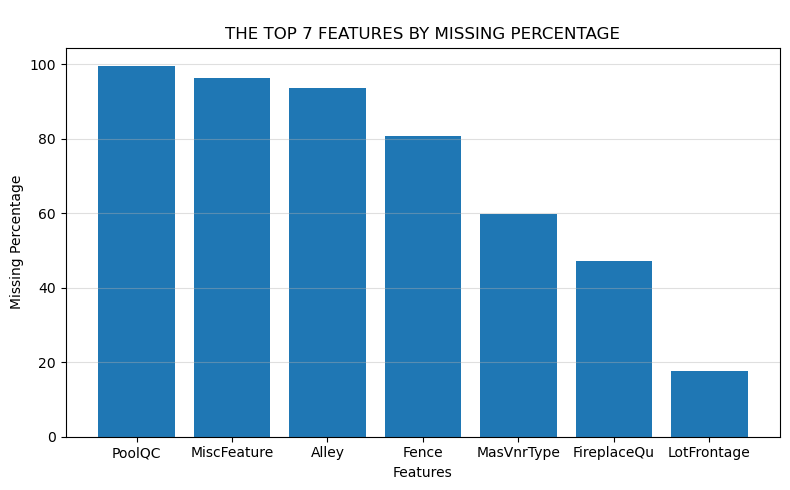

In [8]:
print("      MISSING VALUES ANALYSIS")
print("=" * 50)

missing_data = train_eda.isnull().sum()
missing_pect = missing_data/len(train_eda) * 100
missing_table = pd.DataFrame({
    "Missing Count": missing_data,
    "Percentage": missing_pect
})
missing_table = missing_table[missing_table['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(f"Features with missing values: {len(missing_table)}")
print(missing_table)

plt.figure(figsize = (8, 5))
plt.bar(missing_table.index[:7], missing_table['Percentage'][:7])
plt.title("\nTHE TOP 7 FEATURES BY MISSING PERCENTAGE")
plt.xlabel("Features")
plt.ylabel("Missing Percentage")
plt.grid(True, axis = 'y', alpha = 0.4)
plt.tight_layout()

---
The top 7 features whose missing percentage is grater than 5% needa a serious missing value handling before fed to machine learning lgorithms. So we will handle the in the preprocessing process.

---

----
### 4.3 Distribution Analysis

----

In [9]:
print("FEATURE TYPES SEPARATION")
print("=" * 50)
numeric_features = train_eda.select_dtypes(include='number').columns.tolist()
if "SalePrice" in numeric_features:
    numeric_features.remove("SalePrice")
categorical_features = train_eda.select_dtypes(include='object').columns.tolist()

print(f"Numeric features: {len(numeric_features)}")
print(f"Categorical features: {len(categorical_features)}")

print(f"\nFirst 10 numeric features: {numeric_features[:10]}")
print(f"First 10 categorical features: {categorical_features[:10]}")

FEATURE TYPES SEPARATION
Numeric features: 36
Categorical features: 43

First 10 numeric features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2']
First 10 categorical features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1']


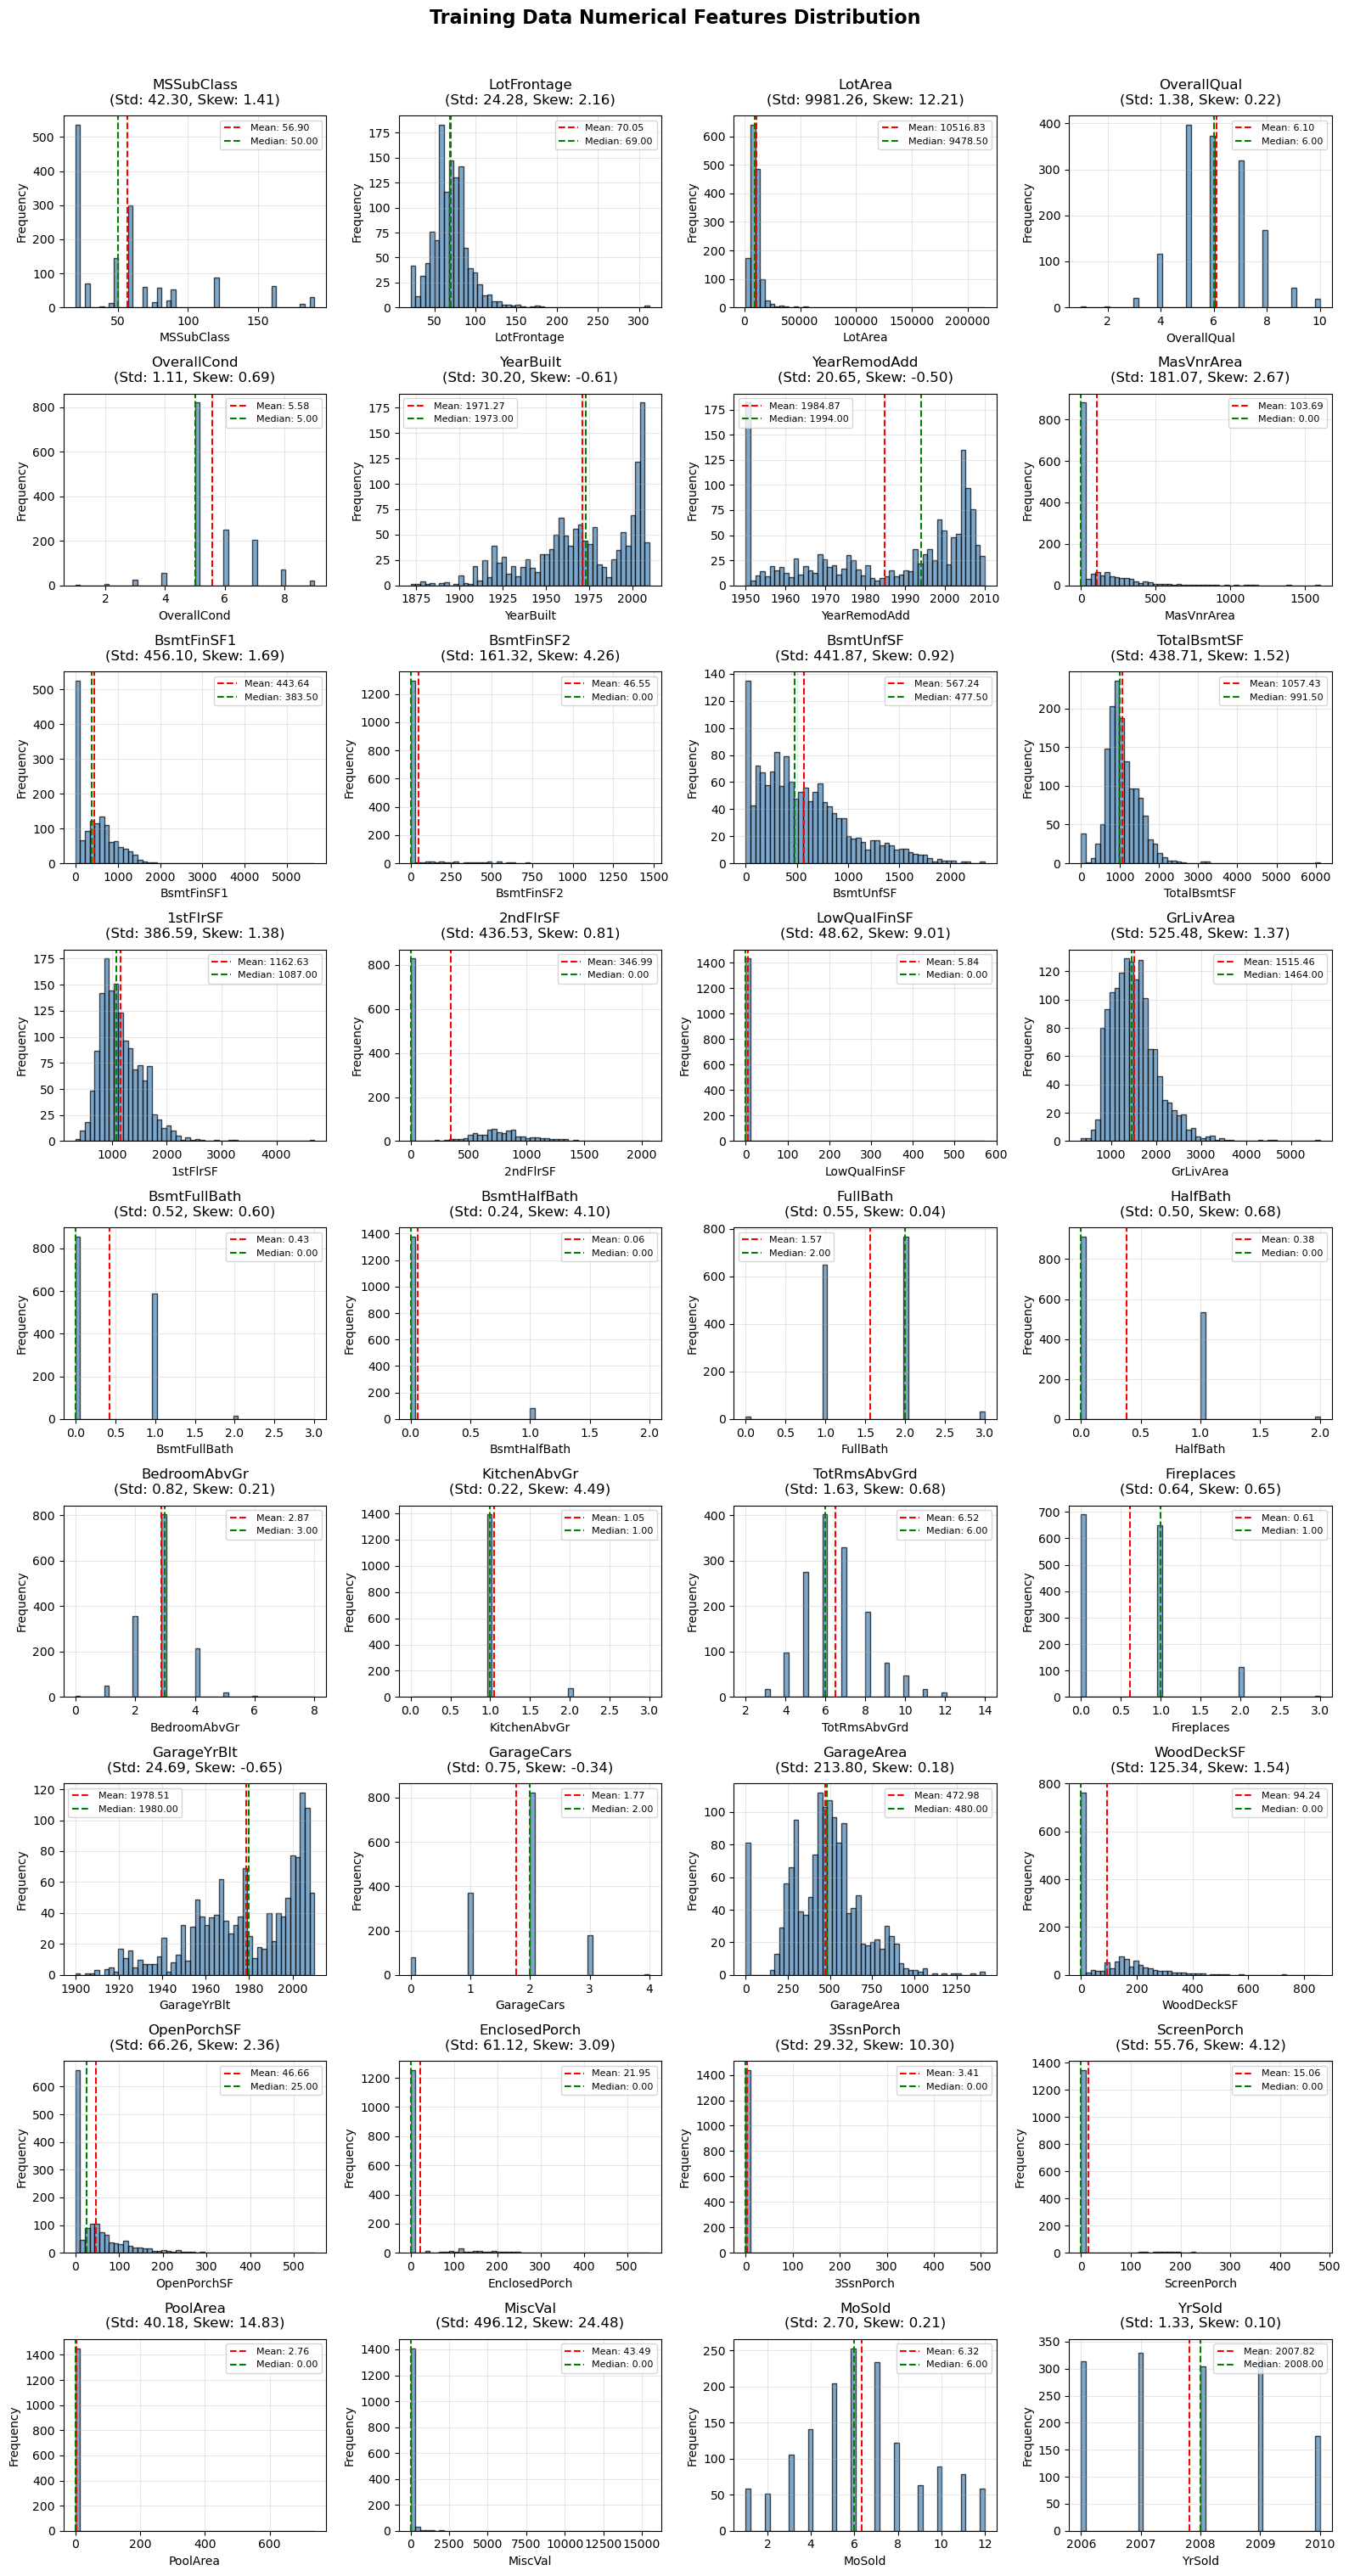

In [10]:
fig, axes = plt.subplots(9, 4, figsize = (16, 30))
fig.suptitle("Training Data Numerical Features Distribution", fontsize = 16, fontweight = 'bold', y = 1.01)
axes_flat = axes.flatten()

for i, feature in enumerate(numeric_features):
    if i < len(axes_flat):
        ax = axes_flat[i]

        ax.hist(train_eda[feature], bins = 50, alpha = 0.7, edgecolor = 'black', color = 'steelblue')

        # basic statistical values
        mean = train_eda[feature].mean()
        median = train_eda[feature].median()
        std = train_eda[feature].std()

        ax.axvline(mean, color = 'red', linestyle = '--', label = f"Mean: {mean:.2f}")
        ax.axvline(median, color = 'green', linestyle = '--', label = f"Median: {median:.2f}")

        # Formatting
        ax.set_title(f'{feature}\n(Std: {std:.2f}, Skew: {train_eda[feature].skew():.2f})', 
                    fontsize=12, pad=10)
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=8)

# Remove empty subplots
for j in range(len(numeric_features), len(axes_flat)):
    fig.delaxes(axes_flat[j])
plt.tight_layout()

----
**Numerical Features Analysis:**
- From our numerical feature analysis we can see that the scale of features is different so we need scaling on most of the features. We wil determine what type of scaling do we need for each features.
- 19 features out of 36 numerical features have a skewness of greater than 1 so these features need serious transformation
- 10 of thse fetures have also moderate skewness which is between 0.5 and 1
- the 7 eatures do not need any transformation

----

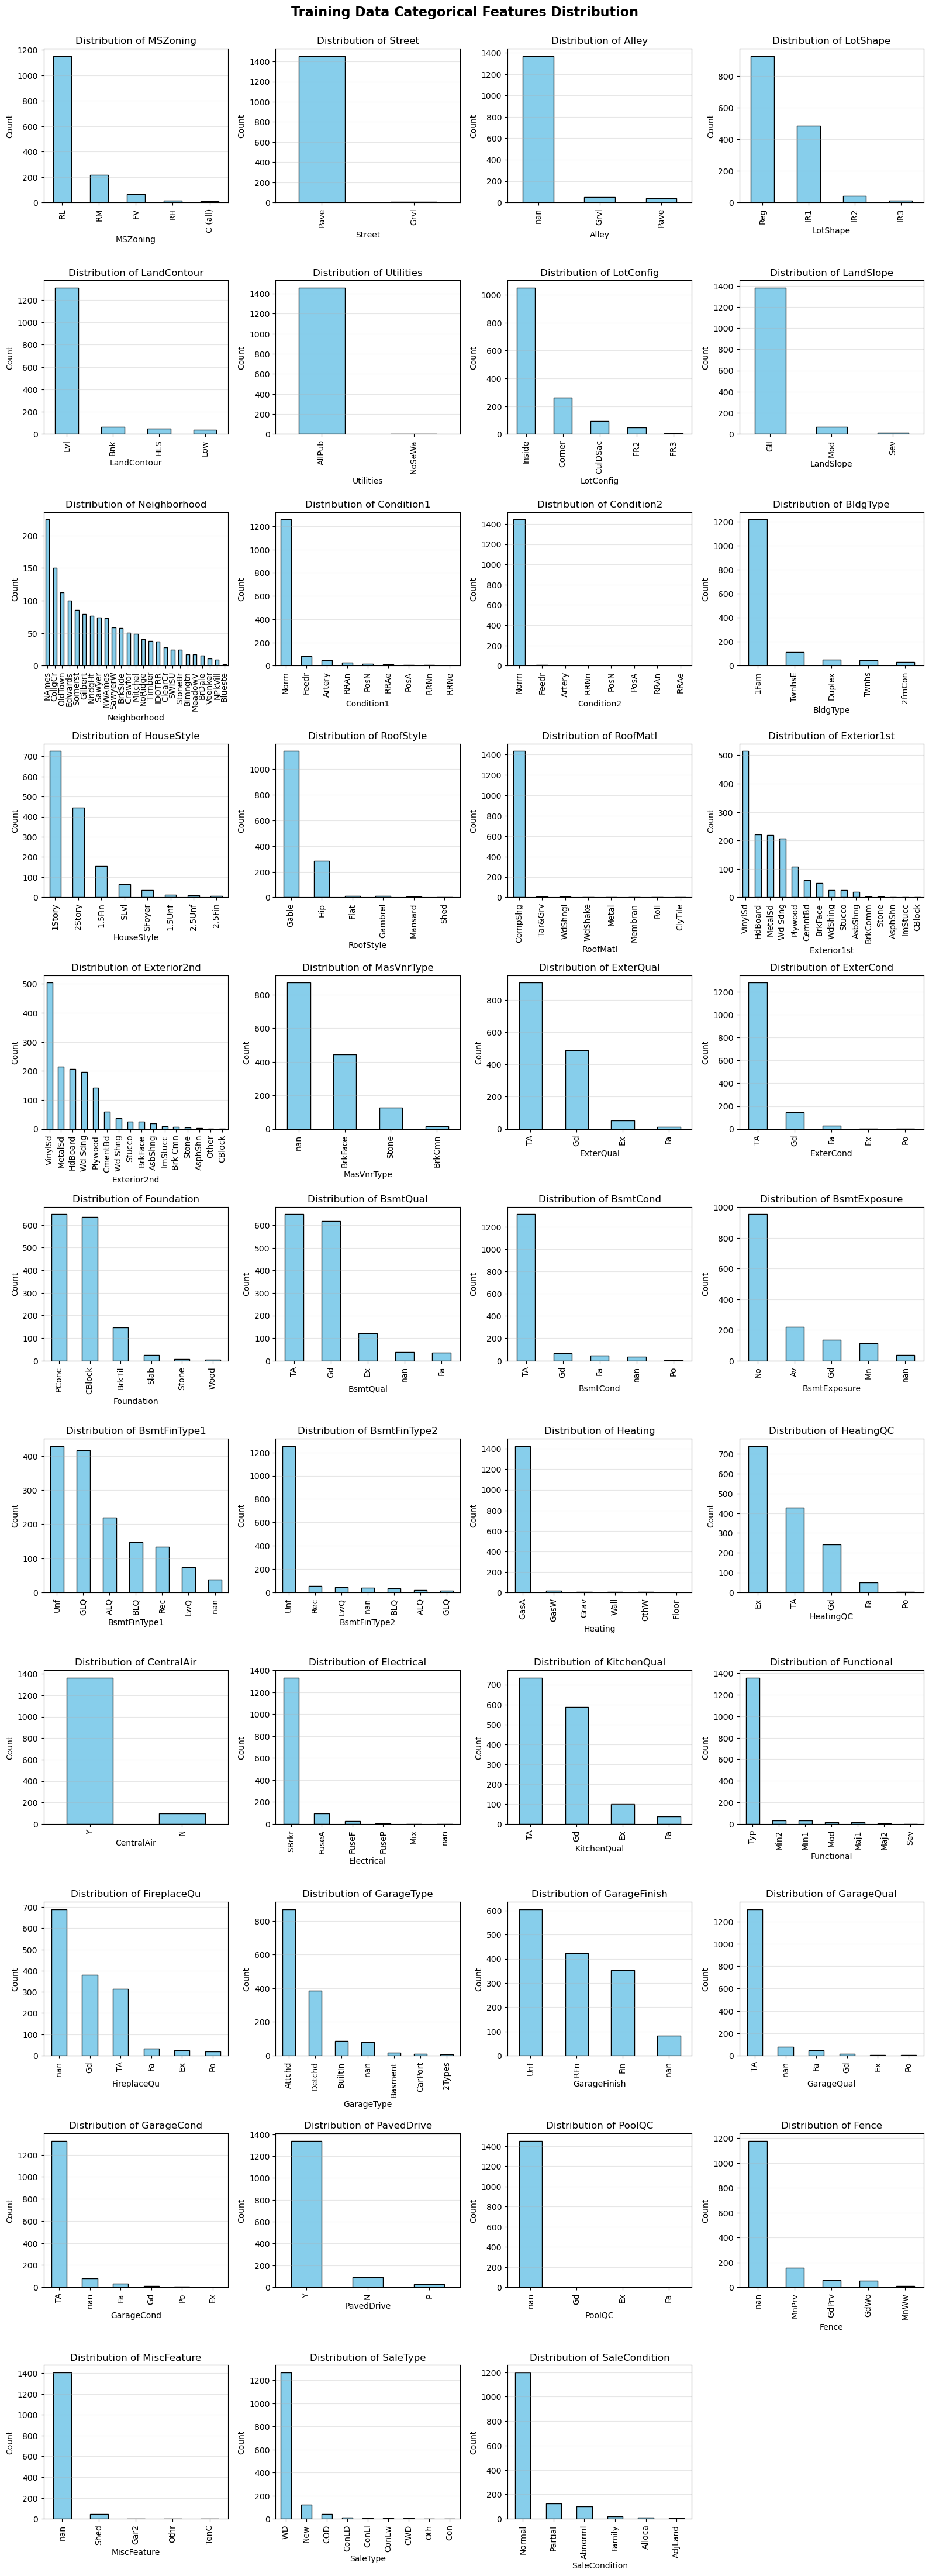

In [11]:
fig, axes = plt.subplots(11, 4, figsize = (16, 44))
fig.suptitle("Training Data Categorical Features Distribution", fontsize = 16, fontweight = 'bold', y = 1.0001)
axes_flat = axes.flatten()

for i, feature in enumerate(categorical_features):
    if i < len(axes_flat):
        ax = axes_flat[i]

    train_eda[feature].value_counts(dropna = False).plot(kind="bar", color="skyblue", edgecolor="black", ax = ax)
    ax.set_title(f"Distribution of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.grid(True, axis = 'y', alpha = 0.3)

for j in range(len(categorical_features), len(axes_flat)):
    fig.delaxes(axes_flat[j])
    
plt.tight_layout()
plt.show()

----
**Categorical Features Analysis:**
- First all categrical features has to be changed to ctegorical data types
- Base on domain knowledge and number of classes in a category we will decide wich encoding we should use

----

----
### 4.4 Target Variable Analysis

----

    TARGET VARIABLE ANALYSIS (SalePrice)
Basic Statistics
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


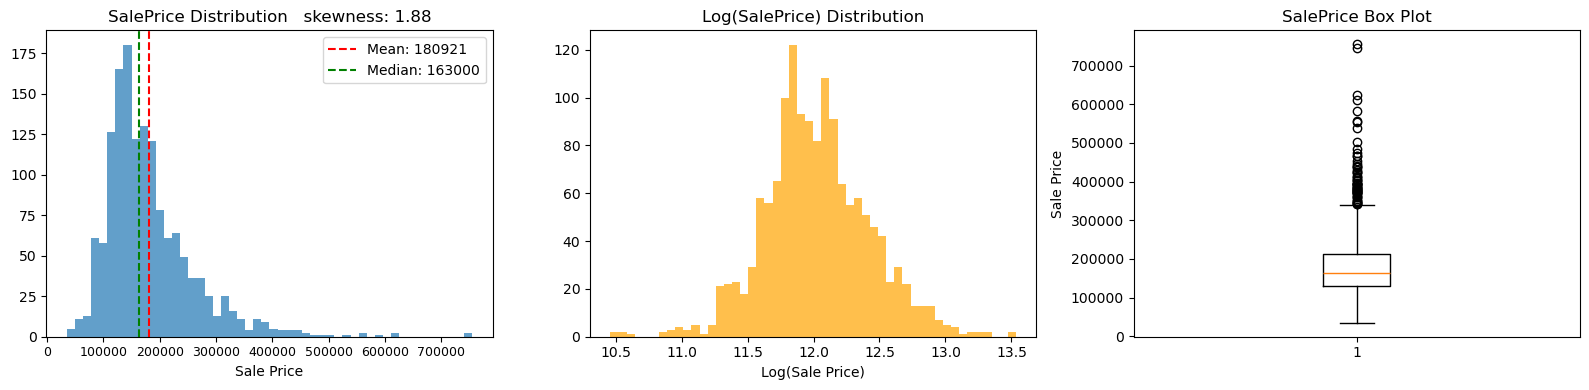

In [12]:
print("    TARGET VARIABLE ANALYSIS (SalePrice)")
print("=" * 50)

target_eda = train_eda['SalePrice']

print("Basic Statistics")
print(target_eda.describe())

# Visualize target distribution
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
mean = target_eda.mean()
median = target_eda.median()
skewness = target_eda.skew()

# Histogram
axes[0].hist(target_eda, bins=50, alpha=0.7)
axes[0].axvline(mean, color = 'red', linestyle = "--", label = f"Mean: {mean:.0f}")
axes[0].axvline(median, color = 'green', linestyle = "--", label = f"Median: {median:.0f}")
axes[0].tick_params(axis='x', labelsize=9) 
axes[0].set_title(f"SalePrice Distribution   skewness: {skewness:.2f}")
axes[0].set_xlabel('Sale Price')
axes[0].legend()

# Log-transformed histogram
axes[1].hist(np.log1p(target_eda), bins=50, alpha=0.7, color='orange')
axes[1].set_title('Log(SalePrice) Distribution')
axes[1].set_xlabel('Log(Sale Price)')

# Box plot
axes[2].boxplot(target_eda)
axes[2].set_title('SalePrice Box Plot')
axes[2].set_ylabel('Sale Price')

plt.tight_layout()
plt.show()

----
**Target Analysis:**
- The target feature is has high scale so we need to address using scaling
- 1.88 skewness is extreme so we will need to taransform the data
- There are also some outliers

----

----
### 4.5 Numerical Feature-Target Analysis

----

     FEATURE-TARGET SCATTER PLOT ANALYSIS


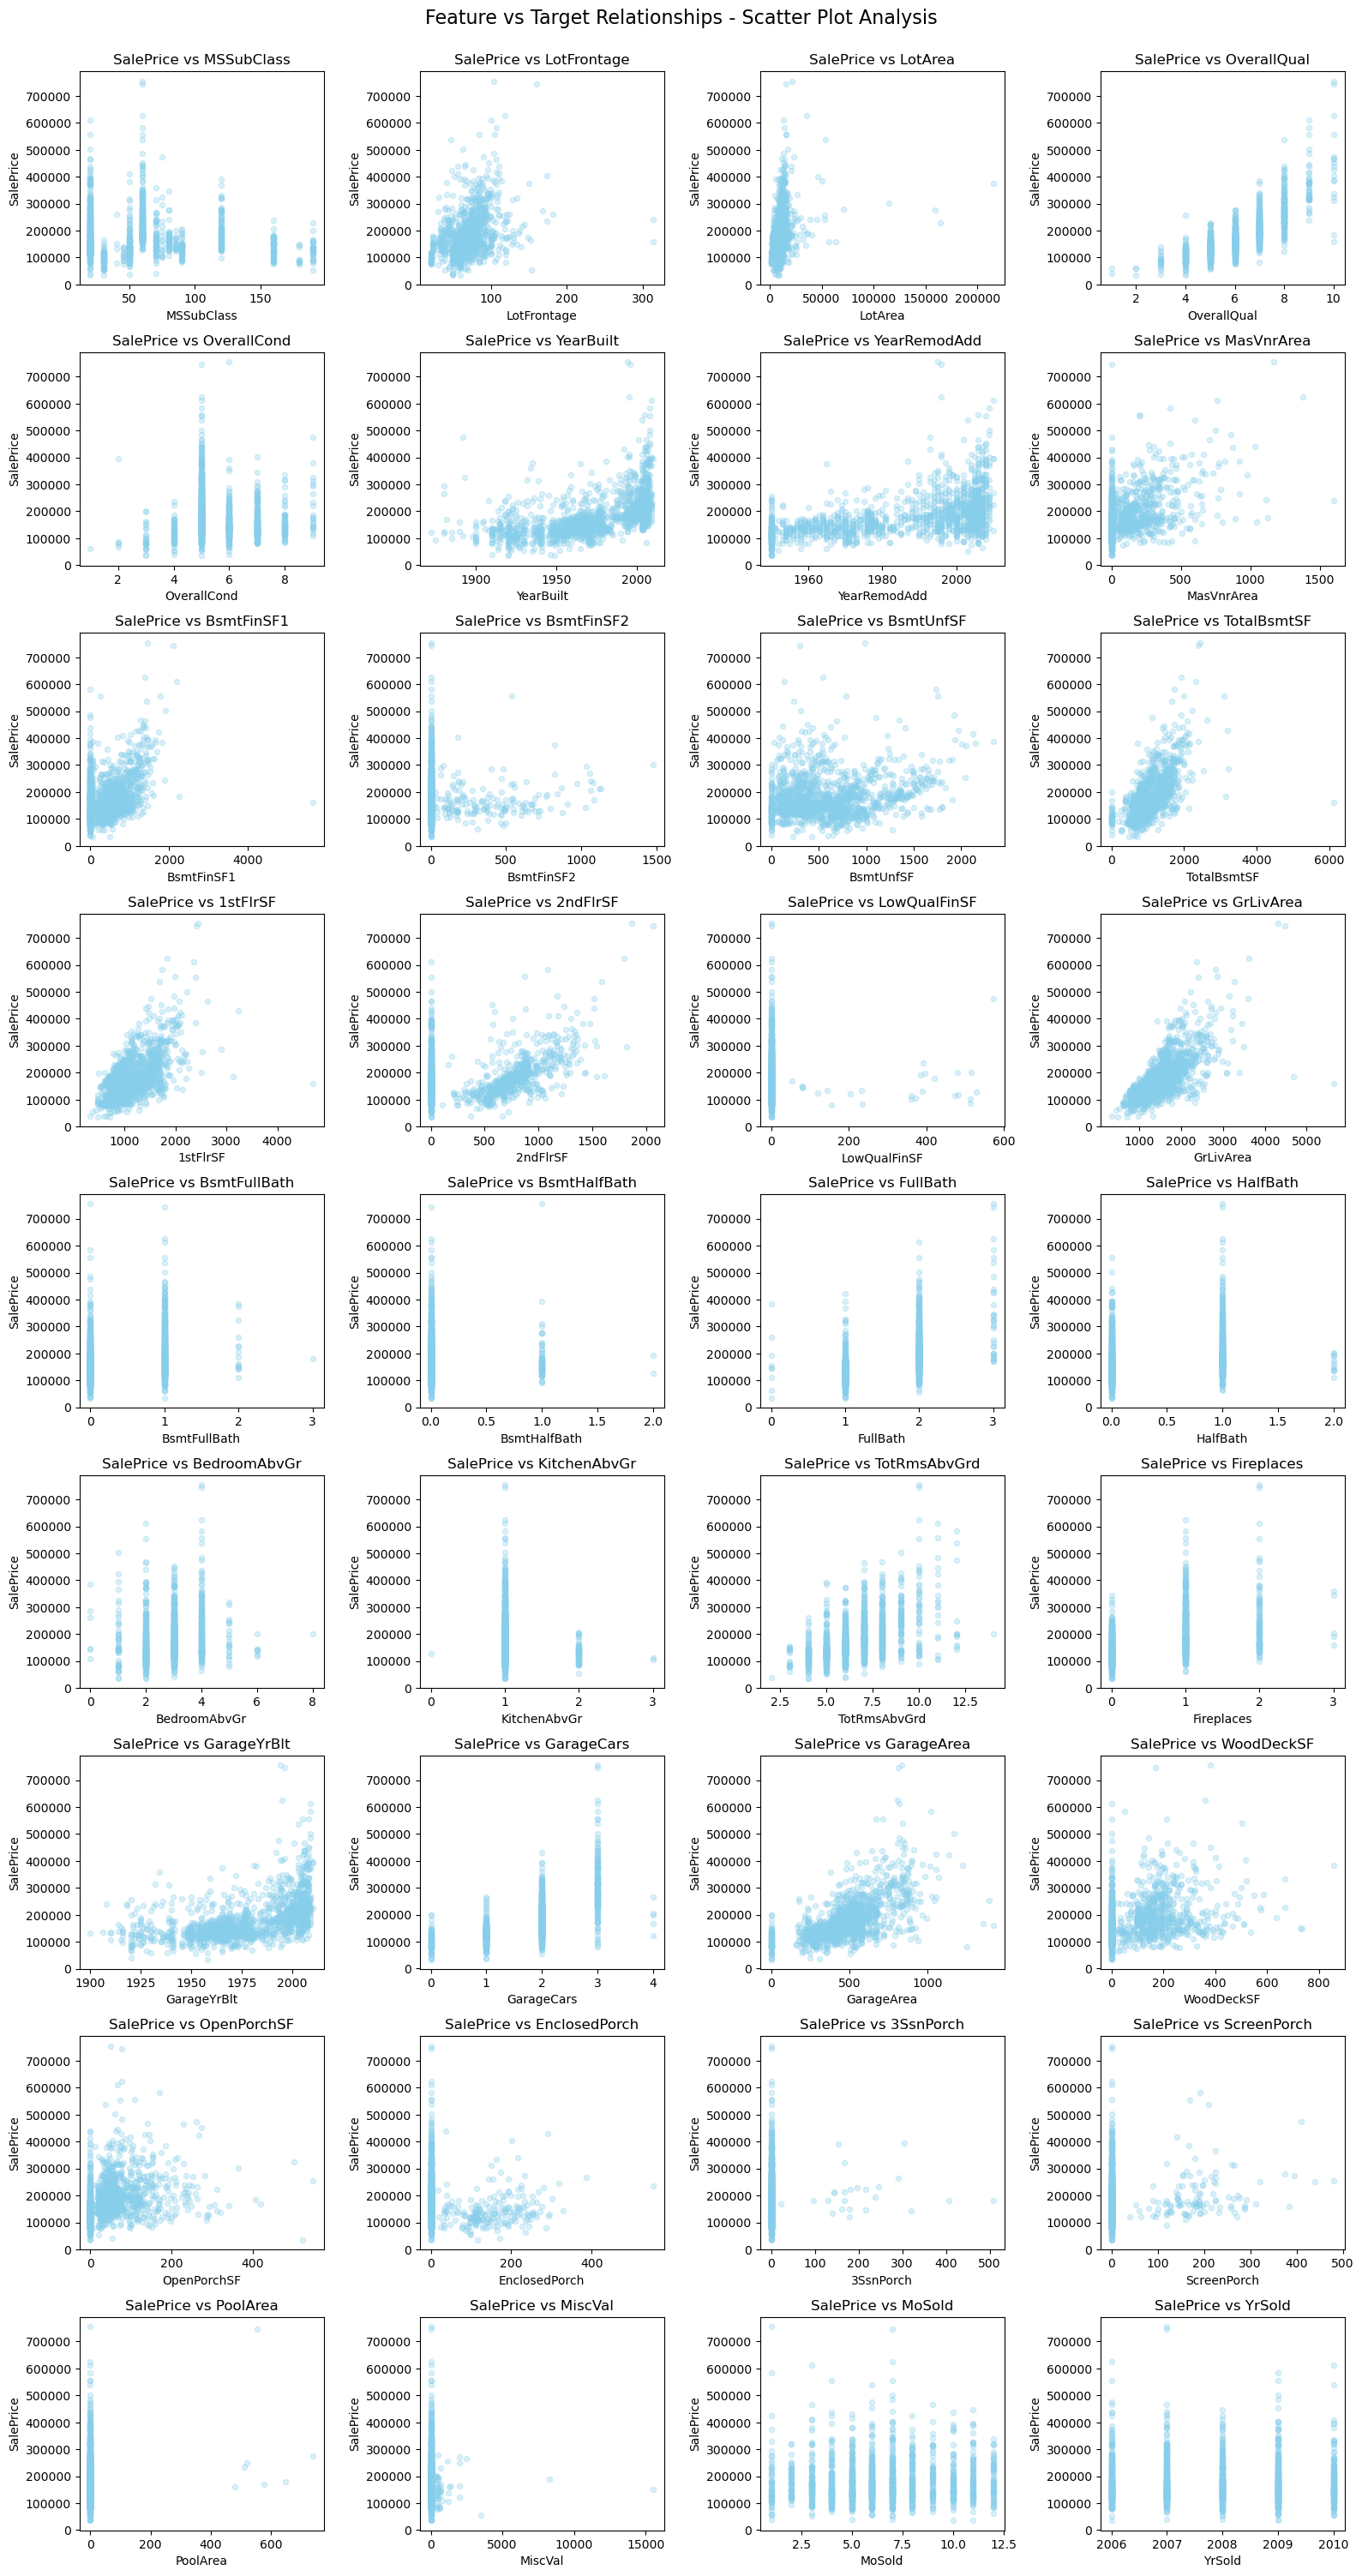

In [13]:
# Detailed scatter plots for feature-target relationships
print("     FEATURE-TARGET SCATTER PLOT ANALYSIS")
print("=" * 50)

# Create scatter plot matrix
fig, axes = plt.subplots(9, 4, figsize = (16, 30))
fig.suptitle("Feature vs Target Relationships - Scatter Plot Analysis", fontsize = 16, y = 1.0001)

axes_flatten = axes.flatten()

for i, feature in enumerate(numeric_features):
    ax = axes_flatten[i]

    ax.scatter(train_eda[feature], train_eda['SalePrice'], color = 'skyblue', alpha = 0.3, s = 20)
    ax.set_title(f"SalePrice vs {feature}")
    ax.set_ylabel('SalePrice')
    ax.set_xlabel(feature)

plt.tight_layout()
plt.show()

----
**Feature-Target Analysis:**
- Most features have posistive correlation with our target value
- 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea, WoodDeckSF, tOTALbSMTSF, BsmtFinF1, LotFrontage seems good predictores for the house price

----

----
### 4.6 Correlation Analysis

----

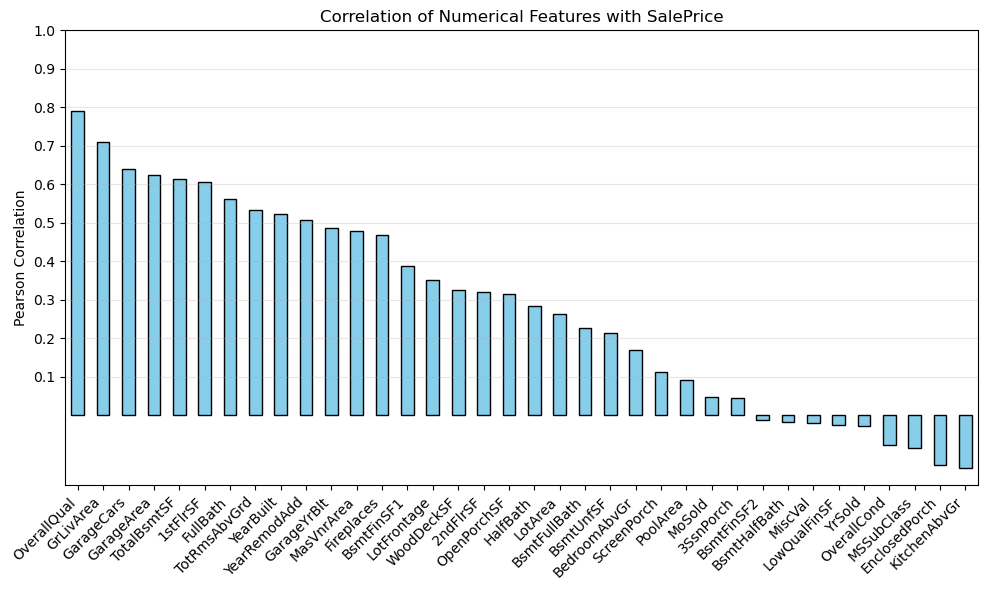

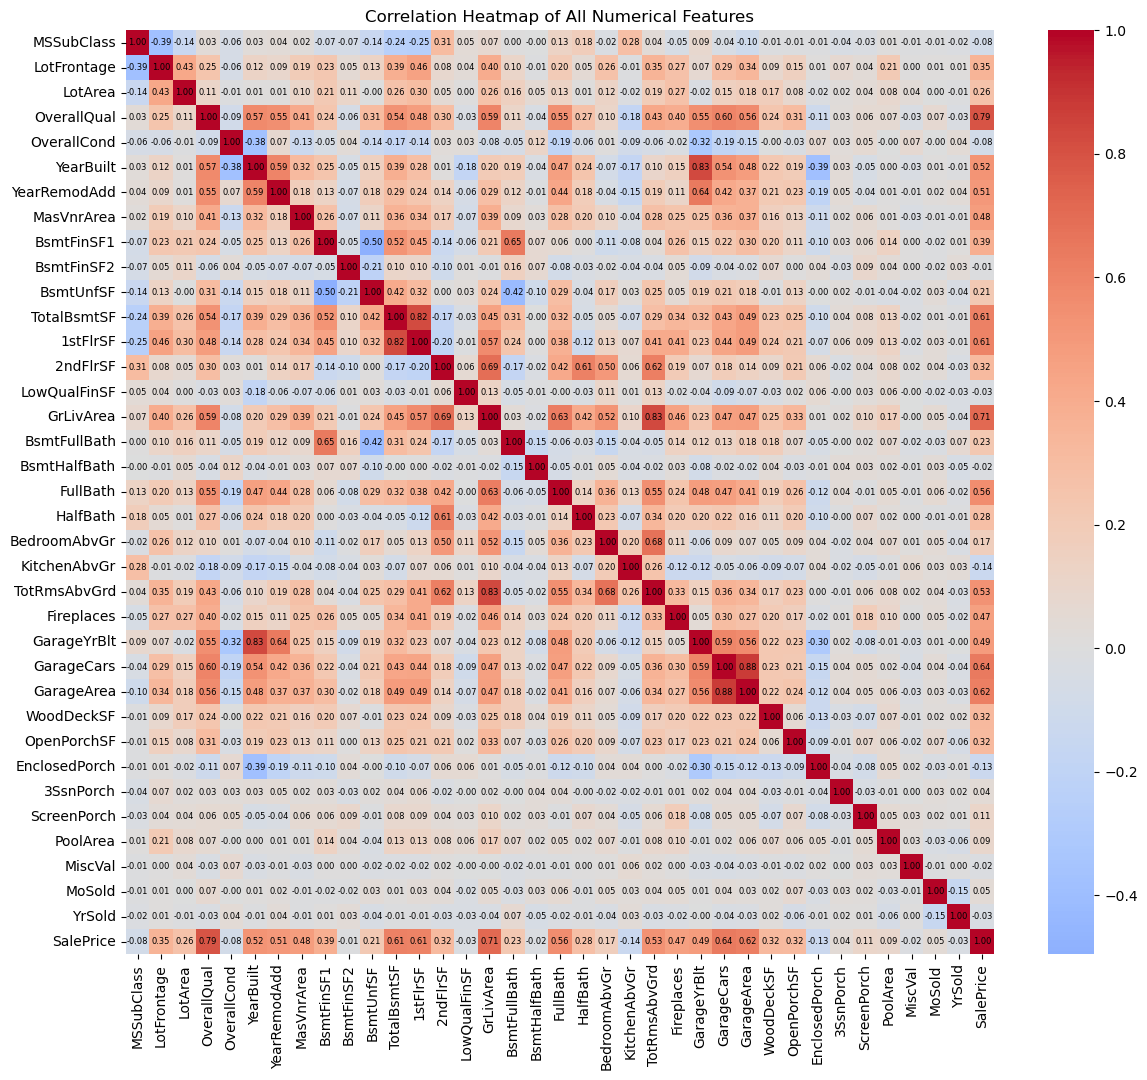

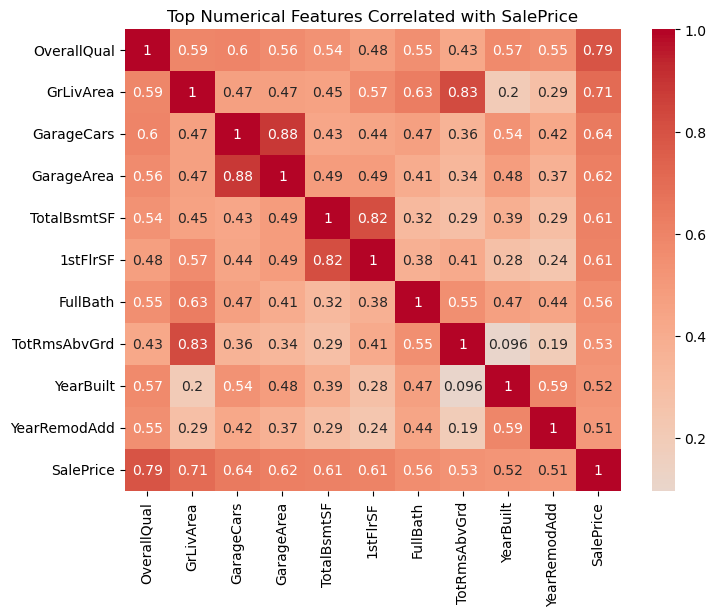

In [14]:
corr_matrix = train_eda[numeric_features + ["SalePrice"]].corr()
corr_target = corr_matrix["SalePrice"].drop("SalePrice").sort_values(ascending=False)

plt.figure(figsize=(10, 6))
corr_target.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Correlation of Numerical Features with SalePrice")
plt.ylabel("Pearson Correlation")
plt.xticks(rotation=45, ha="right")
plt.yticks(np.arange(0.1, 1.1, 0.1))  # Add y-axis ticks from 0.1 to 1
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 6, "color": "black"}, center=0)
plt.title("Correlation Heatmap of All Numerical Features")

top_features = corr_target.abs().sort_values(ascending=False).head(10).index.tolist() + ["SalePrice"]
plt.figure(figsize=(8, 6))
sns.heatmap(train_eda[top_features].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Top Numerical Features Correlated with SalePrice")
plt.show()

----
### 4.6 Categorical Feature-Target Analysis

----

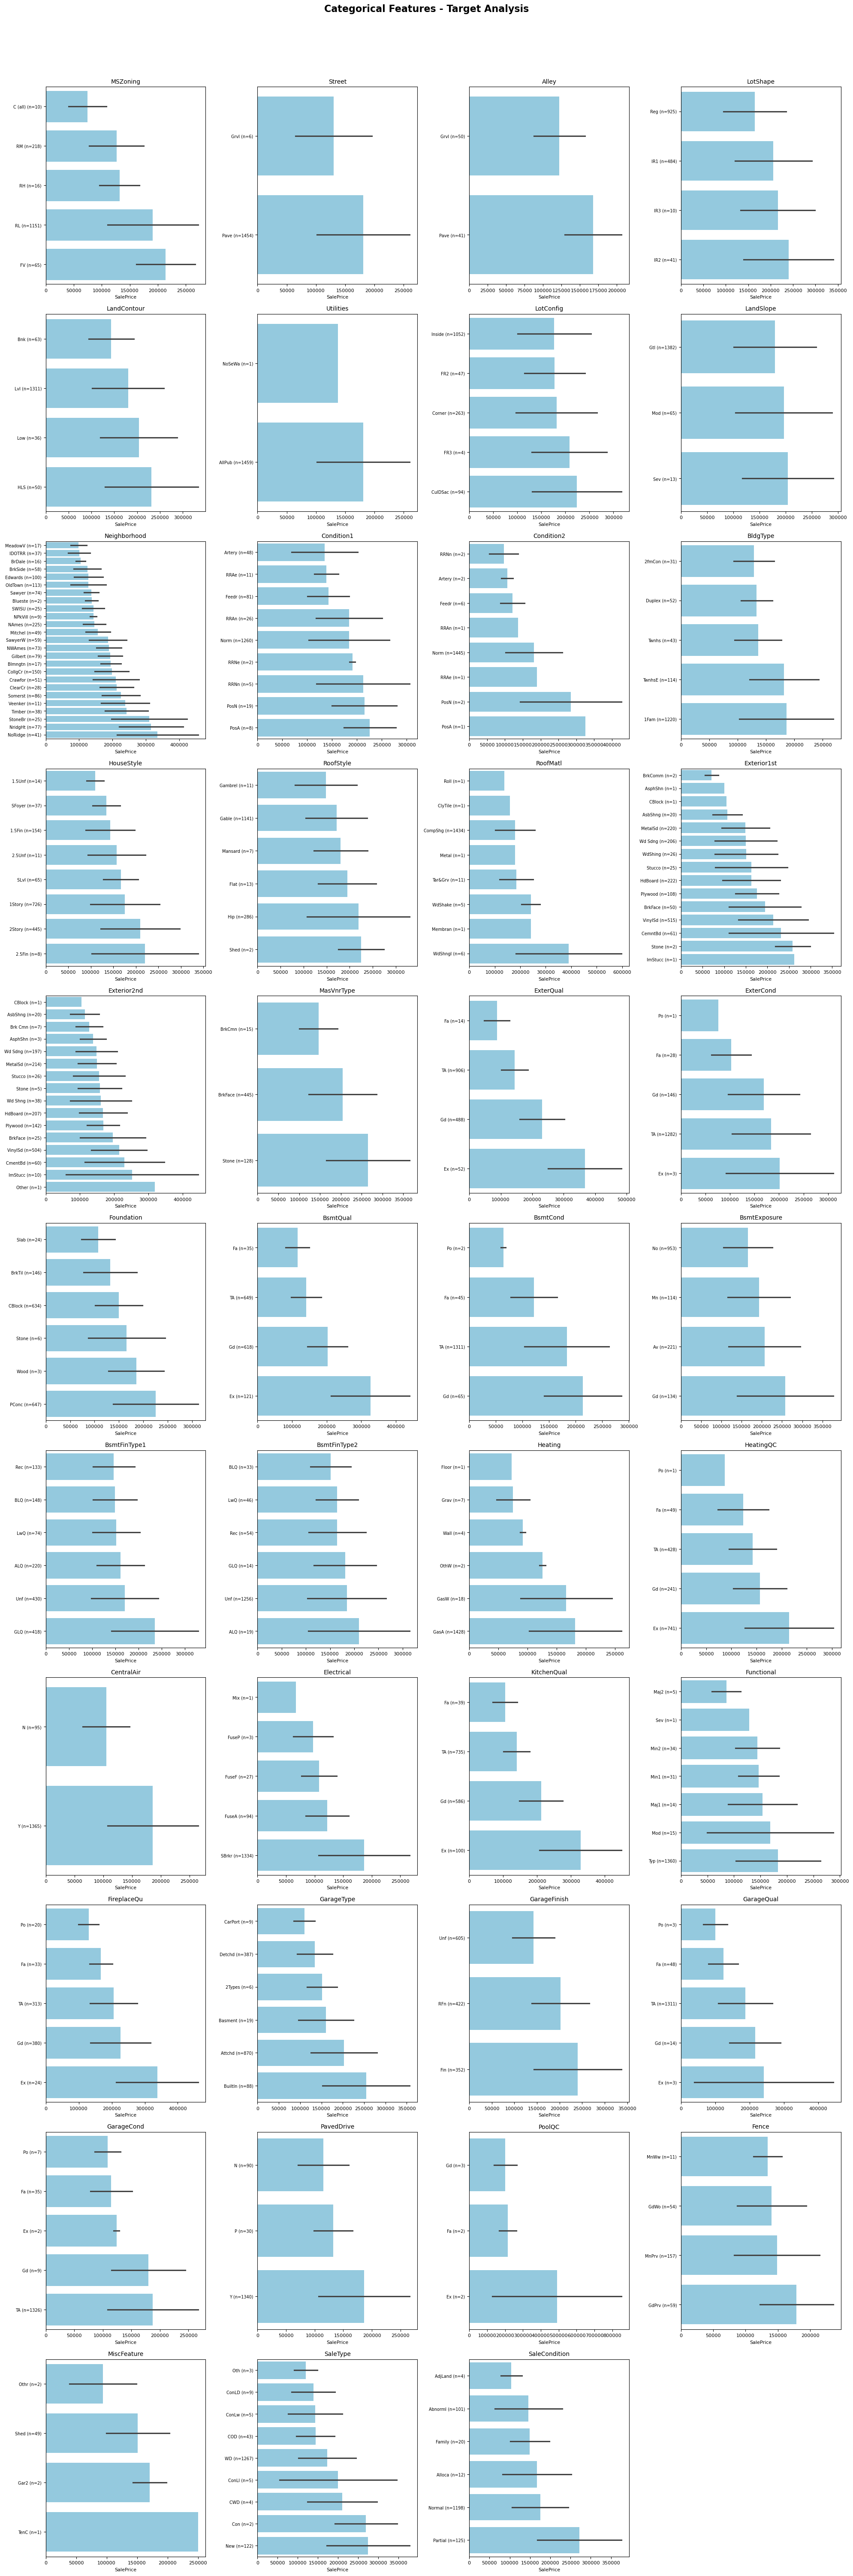

In [15]:
fig, axes = plt.subplots(11, 4, figsize=(20, 60))
fig.suptitle("Categorical Features - Target Analysis", 
             fontsize=16, fontweight="bold", y=1.0001)
axes_flat = axes.flatten()

for i, feature in enumerate(categorical_features):
    if i < len(axes_flat):
        ax = axes_flat[i]

        counts = train_eda[feature].value_counts()
        order = train_eda.groupby(feature)["SalePrice"].mean().sort_values(ascending=False).index

        sns.barplot(
            data=train_eda, y=feature, x="SalePrice", 
            estimator="mean", order=order[::-1],  # reverse order for highest at bottom
            errorbar='sd', ax=ax, color="skyblue"
        )

        labels = [f"{cat} (n={counts[cat]})" if cat in counts else f"{cat} (n=0)" for cat in order[::-1]]
        ax.set_yticks(range(len(order)))
        ax.set_yticklabels(labels, fontsize=7)

        ax.set_title(f"{feature}", fontsize=10)
        ax.set_xlabel("SalePrice", fontsize=8)
        ax.set_ylabel("")
        ax.tick_params(axis="x", labelsize=8)

for j in range(len(categorical_features), len(axes_flat)):
    fig.delaxes(axes_flat[j])

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

----
### 4.7 Exploratory Data Analysis (EDA) Summary – Ames Housing Dataset

----
**1. Overview**

----

The Ames Housing dataset contains 1,460 observations and 79 features, with SalePrice as the target variable. The goal of this EDA was to explore feature distributions, relationships with the target, outliers, missing values, and potential feature engineering opportunities to inform predictive modeling.

----
**2. Data Types and Missing Values**

----

Numerical features: 36  
Categorical features: 43

Missing values are concentrated in features such as:
- PoolQC ~ 99.5%  
- MiscFeature ~ 96.3%  
- Alley ~ 93.8%  
- Fence ~ 80.8%  
- MasVnrType ~ 59.7%  
- FireplaceQu ~ 47.3%    
- LotFrontage ~ 17.7%  
Several features have moderate missingness (e.g., GarageYrBlt) that require imputation.

----
**3. Categorical Feature Insights**

----

- Strong predictors of SalePrice: Neighborhood, OverallQual, ExterQual, KitchenQual.  
- Neighborhood impact: Houses in NridgHt and StoneBr neighborhoods show the highest average SalePrice.
- Ordinal features: ExterQual, KitchenQual, BsmtQual show a clear monotonic increase in SalePrice with higher quality ratings.
- Some features have rare categories that may need grouping or aggregation (e.g., MiscFeature, RoofMatl).
- Most categorical features are skewed toward one or two dominant categories.

----

4. Numerical Feature Insights

----

Top positively correlated features with SalePrice:
- OverallQual (0.79)
- GrLivArea (0.71)
- GarageCars (0.65)
- TotalBsmtSF (0.61)

Moderate correlation: YearBuilt (0.52), GarageArea (0.62)  
Low/no correlation: LowQualFinSF, 3SsnPorch  
Multicollinearity observed: GrLivArea, TotRmsAbvGrd, and TotalBsmtSF are highly correlated.  


----
5. Outliers and Anomalies

----
- Extreme values detected in GrLivArea, LotArea, and 1stFlrSF.  
- Several outliers in SalePrice above $700,000 may influence linear models.  
- Skewed features (e.g., SalePrice, LotArea) could benefit from log-transformation.  

----
6. Feature Engineering / Next Steps

----
- Categorical encoding: 

    - High-cardinality features (Neighborhood, Exterior1st) → target encoding or one-hot with grouping.  
    - Ordinal features (ExterQual, BsmtQual) → map to numeric scores.  
- Missing value handling:  

    - Features with >80% missing can be dropped.  
    - Moderate missingness → imputation (median for numeric, mode or ‘None’ for categorical).  
- Numerical features:    

    - Consider log-transform for skewed distributions (SalePrice, GrLivArea).  
    - Aggregate correlated features or apply PCA for linear models.  


----
7. Key Takeaways

----
- Top predictors of SalePrice: OverallQual, GrLivArea, GarageCars, TotalBsmtSF.
- ategorical variables with strong influence: Neighborhood, ExterQual, KitchenQual.
- Data issues: Missing values in certain features, outliers in several numerical features.
- Preprocessing recommendations:
- Impute missing values appropriately
- Encode categorical features
- Consider transformation for skewed features
- Handle multicollinearity via feature selection or dimensionality reduction.

----
## 5. Preprocessing

----

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class MissingValueHandler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_names_in_ = None
        self.feature_names_out_ = None
        self.n_features_in_ = None
        self.numeric_features_ = None
        self.categorical_features_ = None
        self.is_fitted_ = False

        self.learned_modes_ = {}
        self.learned_medians_ = {}

    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
        
        self.feature_names_in_ = X.columns.tolist()
        self.n_features_in_ = len(self.feature_names_in_)
        self.numeric_features_ = X.select_dtypes(include=[np.number]).columns.tolist()
        self.categorical_features_ = X.select_dtypes(include=["object", "category"]).columns.tolist()

        # Learn medians for numeric features
        for feature in self.numeric_features_:
            self.learned_medians_[feature] = X[feature].median()

        # Learn modes for categorical features (handle all-NaN case)
        for feature in self.categorical_features_:
            mode = X[feature].mode()
            self.learned_modes_[feature] = mode[0] if not mode.empty else "None"

        self.is_fitted_ = True
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")

        check_is_fitted(self, "is_fitted_")

        # Column validation
        for col in X.columns:
            if col not in self.feature_names_in_:
                raise ValueError(f"Unexpected column {col} not seen during fit")
        if X.shape[1] != self.n_features_in_:
            raise ValueError(f"Expected {self.n_features_in_} features, got {X.shape[1]}")

        X_processed = X.copy()

        # Handling garage related features
        garage_cat = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
        garage_num = ["GarageYrBlt", "GarageCars", "GarageArea"]
        mask_garage_na = X_processed['GarageType'].isna()
        X_processed.loc[mask_garage_na, garage_cat] = 'None'
        X_processed.loc[mask_garage_na, garage_num] = 0
        X_processed['GarageYrBlt'] = X_processed['GarageYrBlt'].fillna(X_processed['YearBuilt'])
        for f in garage_cat:
            X_processed[f] = X_processed[f].fillna(self.learned_modes_[f])
        for f in garage_num:
            X_processed[f] = X_processed[f].fillna(self.learned_medians_[f])

        # Handling basement related features
        basement_cat = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
        basement_num = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]
        mask_bsmt_na = X_processed["BsmtQual"].isna()
        X_processed.loc[mask_bsmt_na, basement_cat] = "None"
        X_processed.loc[mask_bsmt_na, basement_num] = 0
        for f in basement_cat:
            X_processed[f] = X_processed[f].fillna(self.learned_modes_[f])
        for f in basement_num:
            X_processed[f] = X_processed[f].fillna(self.learned_medians_[f])

        # Handling other "Not Available" features
        other_cat = ["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"]
        other_num = ["PoolArea", "Fireplaces", "MiscVal"]
        X_processed[other_cat] = X_processed[other_cat].fillna("None")
        X_processed[other_num] = X_processed[other_num].fillna(0)

        # Handling truly missing values
        true_missing_num = ["LotFrontage", "MasVnrArea"]
        true_missing_cat = ["Electrical", "Functional", "Utilities", "Exterior1st", "Exterior2nd"]
        X_processed["LotFrontage"] = X_processed["LotFrontage"].fillna(self.learned_medians_["LotFrontage"])

        # Vectorized MasVnrArea handling
        mask_masvnr_none = X_processed["MasVnrType"] == "None"
        X_processed.loc[mask_masvnr_none, "MasVnrArea"] = 0
        X_processed["MasVnrArea"] = X_processed["MasVnrArea"].fillna(self.learned_medians_["MasVnrArea"])

        for f in true_missing_cat:
            X_processed[f] = X_processed[f].fillna(self.learned_modes_[f])

        # Handling remaining Features
        handled_features = garage_cat + garage_num + basement_cat + basement_num + \
                           other_cat + other_num + true_missing_cat + true_missing_num
        remaining_features = [f for f in self.feature_names_in_ if f not in handled_features]

        remaining_num = X_processed[remaining_features].select_dtypes(include=[np.number]).columns.tolist()
        remaining_cat = X_processed[remaining_features].select_dtypes(include=['object', 'category']).columns.tolist()
        for f in remaining_num:
            X_processed[f] = X_processed[f].fillna(self.learned_medians_[f])
        for f in remaining_cat:
            X_processed[f] = X_processed[f].fillna(self.learned_modes_[f])

        return X_processed

    def get_feature_names_out(self, input_features=None):
        return np.array(self.feature_names_in_)


In [17]:
class PureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, add_features = True, drop_features = True, columns_to_drop = None):
        self.add_features = add_features
        self.drop_features = drop_features
        self.columns_to_drop = columns_to_drop
        
        self.feature_names_in_ = None
        self.feature_names_out_ = None
        self.n_features_in_ = None
        self.numeric_features_ = None
        self.categorical_features_ = None
        self.is_fitted_ = False

    def _ordinal_encoding(self, X):
        ordinal_mappings = {
            "ExterQual": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0},
            "ExterCond": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0},
            "BsmtQual": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0},
            "BsmtCond": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0},
            "HeatingQC": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0},
            "KitchenQual": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0},
            "FireplaceQu": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0},
            "GarageQual": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0},
            "GarageCond": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0},
            "PoolQC": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "None": 0},
    
            "LotShape": {"Reg": 4, "IR1": 3, "IR2": 2, "IR3": 1},
            "LandSlope": {"Gtl": 3, "Mod": 2, "Sev": 1},
            "Utilities": {"AllPub": 4, "NoSewr": 3, "NoSeWa": 2, "ELO": 1},
            "BsmtExposure": {"Gd": 4, "Av": 3, "Mn": 2, "No": 1, "None": 0},
            "Functional": {
                "Typ": 8, "Min1": 7, "Min2": 6,
                "Mod": 5, "Maj1": 4, "Maj2": 3,
                "Sev": 2, "Sal": 1
            },
            "GarageFinish": {"Fin": 3, "RFn": 2, "Unf": 1, "None": 0},
            "PavedDrive": {"Y": 3, "P": 2, "N": 1, 'None':0},
            "Fence": {"GdPrv": 4, "MnPrv": 3, "GdWo": 2, "MnWw": 1, "None": 0},
        }

        for feature, mapping in ordinal_mappings.items():
            if feature in X.columns:
                X[feature] = X[feature].map(mapping).fillna(0).astype(int)

        return X
    def _add_features(self, X):

        # Garage features
        X["GarageCars_per_Area"] = X["GarageCars"] / X["GarageArea"].replace(0, np.nan)
    
        # Living vs lot area
        X["GrLivArea_per_LotArea"] = X["GrLivArea"] / X["LotArea"].replace(0, np.nan)
    
        # Basement and floor ratios
        total_area = (X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]).replace(0, np.nan)
        X["BsmtSF_ratio"] = X["TotalBsmtSF"] / total_area
        X["FirstFlr_ratio"] = X["1stFlrSF"] / total_area
        X["SecondFlr_ratio"] = X["2ndFlrSF"] / total_area
    
        # Rooms and bedrooms
        X["TotalRooms_per_TotalArea"] = X["TotRmsAbvGrd"] / total_area
        X["TotalArea_per_LotArea"] = total_area / X["LotArea"].replace(0, np.nan)
        X["Bedroom_ratio"] = X["BedroomAbvGr"] / X["TotRmsAbvGrd"].replace(0, np.nan)
        X["Bath_ratio"] = (X["FullBath"] + 0.5 * X["HalfBath"]) / X["TotRmsAbvGrd"].replace(0, np.nan)
        X["BsmtBath_ratio"] = (X["BsmtFullBath"] + 0.5 * X["BsmtHalfBath"]) / (X["TotalBsmtSF"].replace(0, np.nan))
    
        # Porch and outdoor features
        X["TotalPorchSF"] = X["OpenPorchSF"] + X["EnclosedPorch"] + X["3SsnPorch"] + X["ScreenPorch"]
        X["Porch_per_LotArea"] = X["TotalPorchSF"] / X["LotArea"].replace(0, np.nan)
        X["Porch_per_GrLivArea"] = X["TotalPorchSF"] / X["GrLivArea"].replace(0, np.nan)
    

        # Misc features
        X["Fireplaces_per_TotalRooms"] = X["Fireplaces"] / X["TotRmsAbvGrd"].replace(0, np.nan)
        X["GarageArea_per_LotArea"] = X["GarageArea"] / X["LotArea"].replace(0, np.nan)
    
        # Replace infinities or NaNs
        X = X.replace([np.inf, -np.inf], np.nan).fillna(0)
        
        return X

    def _drop_features(self, X):

        if self.columns_to_drop:
            for feature in self.columns_to_drop:
                if feature in X.columns:
                    X = X.drop(columns = feature)
        return X

    def _apply_transformations(self, X):
        X_processed = X.copy()

        X_processed = self._ordinal_encoding(X_processed)
        if self.add_features:
            X_processed = self._add_features(X_processed)
        if self.drop_features:
            X_processed = self._drop_features(X_processed)
        
        return X_processed

        
    def fit(self, X, y = None):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
        
        self.feature_names_in_ = X.columns.tolist()
        self.n_features_in_ = len(self.feature_names_in_)
        self.numeric_features_ = X.select_dtypes(include=[np.number]).columns.tolist()
        self.categorical_features_ = X.select_dtypes(include=["object", "category"]).columns.tolist()

        X = self._apply_transformations(X)
        self.feature_names_out_ = X.columns.tolist()
        self.is_fitted_ = True
        
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")

        check_is_fitted(self, "is_fitted_")

        for col in X.columns:
            if col not in self.feature_names_in_:
                raise ValueError(f"Unexpected column {col} not seen during fit")
        if X.shape[1] != self.n_features_in_:
            raise ValueError(f"Expected {self.n_features_in_} features, got {X.shape[1]}")

 
        X = self._apply_transformations(X)
        X = X[self.feature_names_out_]
        return X

    def get_feature_names_out(self):
        return self.feature_names_out_

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from datetime import datetime
from sklearn.utils.validation import check_is_fitted

class FeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_year_features=True, scale_features=True, transform_features=True):
        self.scale_features = scale_features
        self.transform_features = transform_features
        self.drop_year_features = drop_year_features

        self.feature_names_in_ = None
        self.n_features_in_ = None
        self.numerical_features_ = None
        self.categorical_features_ = None
        self.feature_names_out_ = None
        self.encoders_ = {}
        self.scalers_ = {}

        self.features_to_scale = [
            "LotFrontage", "LotArea", "MasVnrArea",
            "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
            "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea",
            "GarageArea",
            "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch",
            "ScreenPorch", "PoolArea", "MiscVal"
        ]

        self.features_to_transform = [
            "LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF",
            "TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","WoodDeckSF",
            "OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal"
        ]
        
        self.age_features = []
        self.is_fitted_ = False

    def _transformation(self, X):
        X = X.copy()
        # log transform skewed features
        tr_features  = [feature for feature in self.features_to_transform if feature in X.columns]
        X[tr_features] = X[tr_features].clip(lower=0)
        X[tr_features] = X[tr_features].apply(np.log1p)

        self.age_features = []
        year_features = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
        current_year = datetime.now().year
        if 'YearBuilt' in X.columns:
            X['HouseAge'] = current_year - X['YearBuilt'].clip(lower=0)
            self.age_features.append('HouseAge')
        if 'YearRemodAdd' in X.columns:
            X['RemodAge'] = current_year - X['YearRemodAdd'].clip(lower=0)
            self.age_features.append('RemodAge')
        if 'GarageYrBlt' in X.columns:
            X['GarageAge'] = current_year - X['GarageYrBlt'].clip(lower=0)
            self.age_features.append('GarageAge')
        if 'YrSold' in X.columns:
            X['YearsSinceSold'] = current_year - X['YrSold'].clip(lower=0)
            self.age_features.append('YearsSinceSold')

        if self.age_features:
            X[self.age_features] = X[self.age_features].apply(np.log1p)
        if self.drop_year_features:
            X = X.drop(columns=year_features, errors="ignore")

        return X
        
    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")

        self.feature_names_in_ = X.columns.tolist()
        self.n_features_in_ = len(self.feature_names_in_)
        self.numerical_features_ = X.select_dtypes(include=[np.number]).columns.tolist()
        self.categorical_features_ = X.select_dtypes(include=['object', 'category']).columns.tolist()

        X_processed = X.copy()

        if self.categorical_features_:
            ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
            self.encoders_['ohe'] = ohe.fit(X_processed[self.categorical_features_])
            encoded = self.encoders_['ohe'].transform(X[self.categorical_features_])
            encoded_df = pd.DataFrame(
                encoded,
                columns=self.encoders_['ohe'].get_feature_names_out(self.categorical_features_),
                index=X.index
            )
            X_processed = X_processed.drop(columns=self.categorical_features_, errors="ignore")
            X_processed = pd.concat([X_processed, encoded_df], axis=1)
        if self.transform_features:
            X_processed = self._transformation(X_processed)
        if self.scale_features:
            existing_features_to_scale = [feature for feature in self.features_to_scale if feature in X_processed.columns]
            cols_to_scale = existing_features_to_scale + self.age_features if self.transform_features else existing_features_to_scale
            sc = StandardScaler()
            self.scalers_['sc'] = sc.fit(X_processed[cols_to_scale])
            scaled = self.scalers_['sc'].transform(X_processed[cols_to_scale])
            scaled_df = pd.DataFrame(scaled, columns=cols_to_scale, index=X.index)
            X_processed[cols_to_scale] = scaled_df

        self.feature_names_out_ = X_processed.columns.tolist()

        self.is_fitted_ = True
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")

        check_is_fitted(self, "is_fitted_")

        for col in X.columns:
            if col not in self.feature_names_in_:
                raise ValueError(f"Unexpected column {col} not seen during fit")
        if X.shape[1] != self.n_features_in_:
            raise ValueError(f"Expected {self.n_features_in_} features, got {X.shape[1]}")

        X_processed = X.copy()
        if self.categorical_features_:
            encoded = self.encoders_['ohe'].transform(X[self.categorical_features_])
            encoded_df = pd.DataFrame(
                encoded,
                columns=self.encoders_['ohe'].get_feature_names_out(self.categorical_features_),
                index=X.index
            )
            X_processed = X_processed.drop(columns=self.categorical_features_, errors="ignore")
            X_processed = pd.concat([X_processed, encoded_df], axis=1)

        if self.transform_features:
            X_processed = self._transformation(X_processed)

        # Scale
        if self.scale_features:
            existing_features_to_scale = [feature for feature in self.features_to_scale if feature in X_processed.columns]
            cols_to_scale = existing_features_to_scale + self.age_features if self.transform_features else existing_features_to_scale
            scaled = self.scalers_['sc'].transform(X_processed[cols_to_scale])
            scaled_df = pd.DataFrame(scaled, columns=cols_to_scale, index=X.index)
            X_processed[cols_to_scale] = scaled_df

        # Reorder to match training
            final_cols = [c for c in self.feature_names_out_ if c in X_processed.columns]
            X_processed = X_processed[final_cols]

        return X_processed
    
    def get_feature_names_out(self):
        return self.feature_names_out_

----
## 6. Model Selection and trining

----

In [19]:
train_X = train.drop(columns = 'SalePrice')
train_y = train['SalePrice'].copy()

----
### 6.1 Linear Models

----

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_validate, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

In [21]:
lin_model = Pipeline([
    ('missingvaluehandler', MissingValueHandler()),
    ('puretransformer', PureTransformer()),
    ('featuretransformer', FeatureTransformer()),
    ('linear', LinearRegression())
])

start_time = time.time()
# Request training scores explicitly
cv_scores = cross_validate(
    lin_model,
    train_X,
    train_y,
    cv=5,
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=True
)

training_time = time.time() - start_time
cv_scores_df = pd.DataFrame(cv_scores)

# RMSE 
train_rmse_scores = np.sqrt(-cv_scores_df['train_neg_mean_squared_error'])
test_rmse_scores  = np.sqrt(-cv_scores_df['test_neg_mean_squared_error'])
print("RMSE (Root Mean Square Error):")
print(f"Train: Mean = {train_rmse_scores.mean():.4f}, Std = {train_rmse_scores.std():.4f}")
print(f"Test : Mean = {test_rmse_scores.mean():.4f}, Std = {test_rmse_scores.std():.4f}")

# MAE
train_mae_scores = -cv_scores_df['train_neg_mean_absolute_error']
test_mae_scores  = -cv_scores_df['test_neg_mean_absolute_error']
print("\nMAE (Mean Absolute Error):")
print(f"Train: Mean = {train_mae_scores.mean():.4f}, Std = {train_mae_scores.std():.4f}")
print(f"Test : Mean = {test_mae_scores.mean():.4f}, Std = {test_mae_scores.std():.4f}")

# R² 
train_r2_scores = cv_scores_df['train_r2']
test_r2_scores  = cv_scores_df['test_r2']
print("\nR² (Coefficient of Determination):")
print(f"Train: Mean = {train_r2_scores.mean():.4f}, Std = {train_r2_scores.std():.4f}")
print(f"Test : Mean = {test_r2_scores.mean():.4f}, Std = {test_r2_scores.std():.4f}")

print(f"\nTotal training time: {training_time:.2f} seconds ({training_time/60:.1f} minutes)")

# Save results
results = {
    'train_rmse_mean': f"{train_rmse_scores.mean():.4f}",
    'test_rmse_mean': f"{test_rmse_scores.mean():.4f}",
    'train_mae_mean': f"{train_mae_scores.mean():.4f}",
    'test_mae_mean': f"{test_mae_scores.mean():.4f}",
    'train_r2_mean': f"{train_r2_scores.mean():.4f}",
    'test_r2_mean': f"{test_r2_scores.mean():.4f}",
    'training_seconds': f"{training_time:.2f}"
}
print(results)

RMSE (Root Mean Square Error):
Train: Mean = 22838.6302, Std = 878.8426
Test : Mean = 35150.0805, Std = 6184.2791

MAE (Mean Absolute Error):
Train: Mean = 15611.0022, Std = 475.9222
Test : Mean = 21558.7842, Std = 1547.0139

R² (Coefficient of Determination):
Train: Mean = 0.9173, Std = 0.0034
Test : Mean = 0.8019, Std = 0.0505

Total training time: 2.65 seconds (0.0 minutes)
{'train_rmse_mean': '22838.6302', 'test_rmse_mean': '35150.0805', 'train_mae_mean': '15611.0022', 'test_mae_mean': '21558.7842', 'train_r2_mean': '0.9173', 'test_r2_mean': '0.8019', 'training_seconds': '2.65'}


In [22]:
lin_model_2 = Pipeline([
    ('missingvaluehandler', MissingValueHandler()),
    ('puretransformer', PureTransformer(add_features=False)),
    ('featuretransformer', FeatureTransformer(scale_features=True, transform_features=True)),
    ('linear', LinearRegression())
])

start_time = time.time()
# Request training scores explicitly
cv_scores = cross_validate(
    lin_model_2,
    train_X,
    train_y,
    cv=5,
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=True
)

training_time = time.time() - start_time
cv_scores_df = pd.DataFrame(cv_scores)

# RMSE 
train_rmse_scores = np.sqrt(-cv_scores_df['train_neg_mean_squared_error'])
test_rmse_scores  = np.sqrt(-cv_scores_df['test_neg_mean_squared_error'])
print("RMSE (Root Mean Square Error):")
print(f"Train: Mean = {train_rmse_scores.mean():.4f}, Std = {train_rmse_scores.std():.4f}")
print(f"Test : Mean = {test_rmse_scores.mean():.4f}, Std = {test_rmse_scores.std():.4f}")

# MAE
train_mae_scores = -cv_scores_df['train_neg_mean_absolute_error']
test_mae_scores  = -cv_scores_df['test_neg_mean_absolute_error']
print("\nMAE (Mean Absolute Error):")
print(f"Train: Mean = {train_mae_scores.mean():.4f}, Std = {train_mae_scores.std():.4f}")
print(f"Test : Mean = {test_mae_scores.mean():.4f}, Std = {test_mae_scores.std():.4f}")

# R² 
train_r2_scores = cv_scores_df['train_r2']
test_r2_scores  = cv_scores_df['test_r2']
print("\nR² (Coefficient of Determination):")
print(f"Train: Mean = {train_r2_scores.mean():.4f}, Std = {train_r2_scores.std():.4f}")
print(f"Test : Mean = {test_r2_scores.mean():.4f}, Std = {test_r2_scores.std():.4f}")

print(f"\nTotal training time: {training_time:.2f} seconds ({training_time/60:.1f} minutes)")

# Save results
results = {
    'train_rmse_mean': f"{train_rmse_scores.mean():.4f}",
    'test_rmse_mean': f"{test_rmse_scores.mean():.4f}",
    'train_mae_mean': f"{train_mae_scores.mean():.4f}",
    'test_mae_mean': f"{test_mae_scores.mean():.4f}",
    'train_r2_mean': f"{train_r2_scores.mean():.4f}",
    'test_r2_mean': f"{test_r2_scores.mean():.4f}",
    'training_seconds': f"{training_time:.2f}"
}
print(results)

RMSE (Root Mean Square Error):
Train: Mean = 23646.5467, Std = 802.9654
Test : Mean = 34186.6429, Std = 5735.8847

MAE (Mean Absolute Error):
Train: Mean = 16107.9163, Std = 445.5560
Test : Mean = 21251.9771, Std = 1251.2813

R² (Coefficient of Determination):
Train: Mean = 0.9113, Std = 0.0032
Test : Mean = 0.8124, Std = 0.0466

Total training time: 2.22 seconds (0.0 minutes)
{'train_rmse_mean': '23646.5467', 'test_rmse_mean': '34186.6429', 'train_mae_mean': '16107.9163', 'test_mae_mean': '21251.9771', 'train_r2_mean': '0.9113', 'test_r2_mean': '0.8124', 'training_seconds': '2.22'}


In [23]:
lasso_model_1 = Pipeline([
    ('missingvaluehandler', MissingValueHandler()),
    ('puretransformer', PureTransformer(add_features=True)),
    ('featuretransformer', FeatureTransformer(scale_features=True, transform_features=True)),
    ('lasso', Lasso(alpha = 10, max_iter=100000))
])

start_time = time.time()
# Request training scores explicitly
cv_scores = cross_validate(
    lasso_model_1,
    train_X,
    train_y,
    cv=5,
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=True
)

training_time = time.time() - start_time
cv_scores_df = pd.DataFrame(cv_scores)

# RMSE 
train_rmse_scores = np.sqrt(-cv_scores_df['train_neg_mean_squared_error'])
test_rmse_scores  = np.sqrt(-cv_scores_df['test_neg_mean_squared_error'])
print("RMSE (Root Mean Square Error):")
print(f"Train: Mean = {train_rmse_scores.mean():.4f}, Std = {train_rmse_scores.std():.4f}")
print(f"Test : Mean = {test_rmse_scores.mean():.4f}, Std = {test_rmse_scores.std():.4f}")

# MAE
train_mae_scores = -cv_scores_df['train_neg_mean_absolute_error']
test_mae_scores  = -cv_scores_df['test_neg_mean_absolute_error']
print("\nMAE (Mean Absolute Error):")
print(f"Train: Mean = {train_mae_scores.mean():.4f}, Std = {train_mae_scores.std():.4f}")
print(f"Test : Mean = {test_mae_scores.mean():.4f}, Std = {test_mae_scores.std():.4f}")

# R² 
train_r2_scores = cv_scores_df['train_r2']
test_r2_scores  = cv_scores_df['test_r2']
print("\nR² (Coefficient of Determination):")
print(f"Train: Mean = {train_r2_scores.mean():.4f}, Std = {train_r2_scores.std():.4f}")
print(f"Test : Mean = {test_r2_scores.mean():.4f}, Std = {test_r2_scores.std():.4f}")

print(f"\nTotal training time: {training_time:.2f} seconds ({training_time/60:.1f} minutes)")

# Save results
results = {
    'train_rmse_mean': f"{train_rmse_scores.mean():.4f}",
    'test_rmse_mean': f"{test_rmse_scores.mean():.4f}",
    'train_mae_mean': f"{train_mae_scores.mean():.4f}",
    'test_mae_mean': f"{test_mae_scores.mean():.4f}",
    'train_r2_mean': f"{train_r2_scores.mean():.4f}",
    'test_r2_mean': f"{test_r2_scores.mean():.4f}",
    'training_seconds': f"{training_time:.2f}"
}
print(results)

RMSE (Root Mean Square Error):
Train: Mean = 23239.0433, Std = 862.0093
Test : Mean = 33079.5771, Std = 6426.5892

MAE (Mean Absolute Error):
Train: Mean = 15803.0915, Std = 440.5433
Test : Mean = 20369.0954, Std = 1566.3656

R² (Coefficient of Determination):
Train: Mean = 0.9143, Std = 0.0033
Test : Mean = 0.8239, Std = 0.0529

Total training time: 3.62 seconds (0.1 minutes)
{'train_rmse_mean': '23239.0433', 'test_rmse_mean': '33079.5771', 'train_mae_mean': '15803.0915', 'test_mae_mean': '20369.0954', 'train_r2_mean': '0.9143', 'test_r2_mean': '0.8239', 'training_seconds': '3.62'}


In [24]:
ridge_model_1 = Pipeline([
    ('missingvaluehandler', MissingValueHandler()),
    ('puretransformer', PureTransformer(add_features=True)),
    ('featuretransformer', FeatureTransformer(scale_features=True, transform_features=True)),
    ('ridge', Ridge(alpha = 10, max_iter=100000))
])

start_time = time.time()
# Request training scores explicitly
cv_scores = cross_validate(
    ridge_model_1,
    train_X,
    train_y,
    cv=5,
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=True
)

training_time = time.time() - start_time
cv_scores_df = pd.DataFrame(cv_scores)

# RMSE 
train_rmse_scores = np.sqrt(-cv_scores_df['train_neg_mean_squared_error'])
test_rmse_scores  = np.sqrt(-cv_scores_df['test_neg_mean_squared_error'])
print("RMSE (Root Mean Square Error):")
print(f"Train: Mean = {train_rmse_scores.mean():.4f}, Std = {train_rmse_scores.std():.4f}")
print(f"Test : Mean = {test_rmse_scores.mean():.4f}, Std = {test_rmse_scores.std():.4f}")

# MAE
train_mae_scores = -cv_scores_df['train_neg_mean_absolute_error']
test_mae_scores  = -cv_scores_df['test_neg_mean_absolute_error']
print("\nMAE (Mean Absolute Error):")
print(f"Train: Mean = {train_mae_scores.mean():.4f}, Std = {train_mae_scores.std():.4f}")
print(f"Test : Mean = {test_mae_scores.mean():.4f}, Std = {test_mae_scores.std():.4f}")

# R² 
train_r2_scores = cv_scores_df['train_r2']
test_r2_scores  = cv_scores_df['test_r2']
print("\nR² (Coefficient of Determination):")
print(f"Train: Mean = {train_r2_scores.mean():.4f}, Std = {train_r2_scores.std():.4f}")
print(f"Test : Mean = {test_r2_scores.mean():.4f}, Std = {test_r2_scores.std():.4f}")

print(f"\nTotal training time: {training_time:.2f} seconds ({training_time/60:.1f} minutes)")

# Save results
results = {
    'train_rmse_mean': f"{train_rmse_scores.mean():.4f}",
    'test_rmse_mean': f"{test_rmse_scores.mean():.4f}",
    'train_mae_mean': f"{train_mae_scores.mean():.4f}",
    'test_mae_mean': f"{test_mae_scores.mean():.4f}",
    'train_r2_mean': f"{train_r2_scores.mean():.4f}",
    'test_r2_mean': f"{test_r2_scores.mean():.4f}",
    'training_seconds': f"{training_time:.2f}"
}
print(results)

RMSE (Root Mean Square Error):
Train: Mean = 26867.5755, Std = 1409.5889
Test : Mean = 31403.9469, Std = 6507.6952

MAE (Mean Absolute Error):
Train: Mean = 17043.7715, Std = 521.1627
Test : Mean = 19548.7383, Std = 1544.3937

R² (Coefficient of Determination):
Train: Mean = 0.8854, Std = 0.0096
Test : Mean = 0.8404, Std = 0.0545

Total training time: 2.48 seconds (0.0 minutes)
{'train_rmse_mean': '26867.5755', 'test_rmse_mean': '31403.9469', 'train_mae_mean': '17043.7715', 'test_mae_mean': '19548.7383', 'train_r2_mean': '0.8854', 'test_r2_mean': '0.8404', 'training_seconds': '2.48'}


In [25]:
ridge_model_2 = Pipeline([
    ('missingvaluehandler', MissingValueHandler()),
    ('puretransformer', PureTransformer(add_features=False)),
    ('featuretransformer', FeatureTransformer(scale_features=False, transform_features=False, drop_year_features=False)),
    ('ridge', Ridge(alpha = 100, max_iter=100000))
])

start_time = time.time()
# Request training scores explicitly
cv_scores = cross_validate(
    ridge_model_2,
    train_X,
    train_y,
    cv=5,
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=True
)

training_time = time.time() - start_time
cv_scores_df = pd.DataFrame(cv_scores)

# RMSE 
train_rmse_scores = np.sqrt(-cv_scores_df['train_neg_mean_squared_error'])
test_rmse_scores  = np.sqrt(-cv_scores_df['test_neg_mean_squared_error'])
print("RMSE (Root Mean Square Error):")
print(f"Train: Mean = {train_rmse_scores.mean():.4f}, Std = {train_rmse_scores.std():.4f}")
print(f"Test : Mean = {test_rmse_scores.mean():.4f}, Std = {test_rmse_scores.std():.4f}")

# MAE
train_mae_scores = -cv_scores_df['train_neg_mean_absolute_error']
test_mae_scores  = -cv_scores_df['test_neg_mean_absolute_error']
print("\nMAE (Mean Absolute Error):")
print(f"Train: Mean = {train_mae_scores.mean():.4f}, Std = {train_mae_scores.std():.4f}")
print(f"Test : Mean = {test_mae_scores.mean():.4f}, Std = {test_mae_scores.std():.4f}")

# R² 
train_r2_scores = cv_scores_df['train_r2']
test_r2_scores  = cv_scores_df['test_r2']
print("\nR² (Coefficient of Determination):")
print(f"Train: Mean = {train_r2_scores.mean():.4f}, Std = {train_r2_scores.std():.4f}")
print(f"Test : Mean = {test_r2_scores.mean():.4f}, Std = {test_r2_scores.std():.4f}")

print(f"\nTotal training time: {training_time:.2f} seconds ({training_time/60:.1f} minutes)")

# Save results
results = {
    'train_rmse_mean': f"{train_rmse_scores.mean():.4f}",
    'test_rmse_mean': f"{test_rmse_scores.mean():.4f}",
    'train_mae_mean': f"{train_mae_scores.mean():.4f}",
    'test_mae_mean': f"{test_mae_scores.mean():.4f}",
    'train_r2_mean': f"{train_r2_scores.mean():.4f}",
    'test_r2_mean': f"{test_r2_scores.mean():.4f}",
    'training_seconds': f"{training_time:.2f}"
}
print(results)

RMSE (Root Mean Square Error):
Train: Mean = 29257.4078, Std = 1866.1437
Test : Mean = 32710.0244, Std = 8611.1551

MAE (Mean Absolute Error):
Train: Mean = 17340.3510, Std = 695.8439
Test : Mean = 18837.9491, Std = 1408.4900

R² (Coefficient of Determination):
Train: Mean = 0.8639, Std = 0.0148
Test : Mean = 0.8239, Std = 0.0854

Total training time: 1.65 seconds (0.0 minutes)
{'train_rmse_mean': '29257.4078', 'test_rmse_mean': '32710.0244', 'train_mae_mean': '17340.3510', 'test_mae_mean': '18837.9491', 'train_r2_mean': '0.8639', 'test_r2_mean': '0.8239', 'training_seconds': '1.65'}


----
### 6.2 Tree-Based Models

----

In [26]:
tree_model = Pipeline([
    ('missingvaluehandler', MissingValueHandler()),
    ('puretransformer', PureTransformer(add_features=True)),
    ('featuretransformer', FeatureTransformer(scale_features=False, transform_features=False, drop_year_features=False)),
    ('ridge', DecisionTreeRegressor(max_depth=18, min_samples_leaf=5, min_samples_split=10, random_state=42)
)
])

start_time = time.time()
# Request training scores explicitly
cv_scores = cross_validate(
    tree_model,
    train_X,
    train_y,
    cv=5,
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=True
)

training_time = time.time() - start_time
cv_scores_df = pd.DataFrame(cv_scores)

# RMSE 
train_rmse_scores = np.sqrt(-cv_scores_df['train_neg_mean_squared_error'])
test_rmse_scores  = np.sqrt(-cv_scores_df['test_neg_mean_squared_error'])
print("RMSE (Root Mean Square Error):")
print(f"Train: Mean = {train_rmse_scores.mean():.4f}, Std = {train_rmse_scores.std():.4f}")
print(f"Test : Mean = {test_rmse_scores.mean():.4f}, Std = {test_rmse_scores.std():.4f}")

# MAE
train_mae_scores = -cv_scores_df['train_neg_mean_absolute_error']
test_mae_scores  = -cv_scores_df['test_neg_mean_absolute_error']
print("\nMAE (Mean Absolute Error):")
print(f"Train: Mean = {train_mae_scores.mean():.4f}, Std = {train_mae_scores.std():.4f}")
print(f"Test : Mean = {test_mae_scores.mean():.4f}, Std = {test_mae_scores.std():.4f}")

# R² 
train_r2_scores = cv_scores_df['train_r2']
test_r2_scores  = cv_scores_df['test_r2']
print("\nR² (Coefficient of Determination):")
print(f"Train: Mean = {train_r2_scores.mean():.4f}, Std = {train_r2_scores.std():.4f}")
print(f"Test : Mean = {test_r2_scores.mean():.4f}, Std = {test_r2_scores.std():.4f}")

print(f"\nTotal training time: {training_time:.2f} seconds ({training_time/60:.1f} minutes)")

# Save results
results = {
    'train_rmse_mean': f"{train_rmse_scores.mean():.4f}",
    'test_rmse_mean': f"{test_rmse_scores.mean():.4f}",
    'train_mae_mean': f"{train_mae_scores.mean():.4f}",
    'test_mae_mean': f"{test_mae_scores.mean():.4f}",
    'train_r2_mean': f"{train_r2_scores.mean():.4f}",
    'test_r2_mean': f"{test_r2_scores.mean():.4f}",
    'training_seconds': f"{training_time:.2f}"
}
print(results)

RMSE (Root Mean Square Error):
Train: Mean = 19168.1919, Std = 874.0815
Test : Mean = 41926.7480, Std = 6499.6101

MAE (Mean Absolute Error):
Train: Mean = 11616.8770, Std = 359.1870
Test : Mean = 25562.6336, Std = 1990.6905

R² (Coefficient of Determination):
Train: Mean = 0.9416, Std = 0.0059
Test : Mean = 0.7141, Std = 0.0783

Total training time: 1.56 seconds (0.0 minutes)
{'train_rmse_mean': '19168.1919', 'test_rmse_mean': '41926.7480', 'train_mae_mean': '11616.8770', 'test_mae_mean': '25562.6336', 'train_r2_mean': '0.9416', 'test_r2_mean': '0.7141', 'training_seconds': '1.56'}


----
### 6.2 Forest-Based Models

----

In [27]:
forest_model = Pipeline([
    ('missingvaluehandler', MissingValueHandler()),
    ('puretransformer', PureTransformer(add_features=False)),
    ('featuretransformer', FeatureTransformer(scale_features=False, transform_features=False, drop_year_features=False)),
    ('forest', RandomForestRegressor(n_estimators=500, max_depth=25, min_samples_leaf=10))
])

start_time = time.time()
# Request training scores explicitly
cv_scores = cross_validate(
    forest_model,
    train_X,
    train_y,
    cv=5,
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=True
)

training_time = time.time() - start_time
cv_scores_df = pd.DataFrame(cv_scores)

# RMSE 
train_rmse_scores = np.sqrt(-cv_scores_df['train_neg_mean_squared_error'])
test_rmse_scores  = np.sqrt(-cv_scores_df['test_neg_mean_squared_error'])
print("RMSE (Root Mean Square Error):")
print(f"Train: Mean = {train_rmse_scores.mean():.4f}, Std = {train_rmse_scores.std():.4f}")
print(f"Test : Mean = {test_rmse_scores.mean():.4f}, Std = {test_rmse_scores.std():.4f}")

# MAE
train_mae_scores = -cv_scores_df['train_neg_mean_absolute_error']
test_mae_scores  = -cv_scores_df['test_neg_mean_absolute_error']
print("\nMAE (Mean Absolute Error):")
print(f"Train: Mean = {train_mae_scores.mean():.4f}, Std = {train_mae_scores.std():.4f}")
print(f"Test : Mean = {test_mae_scores.mean():.4f}, Std = {test_mae_scores.std():.4f}")

# R² 
train_r2_scores = cv_scores_df['train_r2']
test_r2_scores  = cv_scores_df['test_r2']
print("\nR² (Coefficient of Determination):")
print(f"Train: Mean = {train_r2_scores.mean():.4f}, Std = {train_r2_scores.std():.4f}")
print(f"Test : Mean = {test_r2_scores.mean():.4f}, Std = {test_r2_scores.std():.4f}")

print(f"\nTotal training time: {training_time:.2f} seconds ({training_time/60:.1f} minutes)")

# Save results
results = {
    'train_rmse_mean': f"{train_rmse_scores.mean():.4f}",
    'test_rmse_mean': f"{test_rmse_scores.mean():.4f}",
    'train_mae_mean': f"{train_mae_scores.mean():.4f}",
    'test_mae_mean': f"{test_mae_scores.mean():.4f}",
    'train_r2_mean': f"{train_r2_scores.mean():.4f}",
    'test_r2_mean': f"{test_r2_scores.mean():.4f}",
    'training_seconds': f"{training_time:.2f}"
}
print(results)

RMSE (Root Mean Square Error):
Train: Mean = 25753.7791, Std = 1166.2653
Test : Mean = 31781.8277, Std = 5284.9963

MAE (Mean Absolute Error):
Train: Mean = 14386.7001, Std = 372.4388
Test : Mean = 18946.2037, Std = 1105.8512

R² (Coefficient of Determination):
Train: Mean = 0.8947, Std = 0.0074
Test : Mean = 0.8387, Std = 0.0337

Total training time: 34.54 seconds (0.6 minutes)
{'train_rmse_mean': '25753.7791', 'test_rmse_mean': '31781.8277', 'train_mae_mean': '14386.7001', 'test_mae_mean': '18946.2037', 'train_r2_mean': '0.8947', 'test_r2_mean': '0.8387', 'training_seconds': '34.54'}


----
### 6.2 Gradent-Based Models

----

In [28]:
xg_model = Pipeline([
    ('missingvaluehandler', MissingValueHandler()),
    ('puretransformer', PureTransformer(add_features=False)),
    ('featuretransformer', FeatureTransformer(scale_features=False, transform_features=False, drop_year_features=False)),
    ('forest', XGBRegressor(random_state = 42))
])

start_time = time.time()
# Request training scores explicitly
cv_scores = cross_validate(
    xg_model,
    train_X,
    train_y,
    cv=5,
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=True
)

training_time = time.time() - start_time
cv_scores_df = pd.DataFrame(cv_scores)

# RMSE 
train_rmse_scores = np.sqrt(-cv_scores_df['train_neg_mean_squared_error'])
test_rmse_scores  = np.sqrt(-cv_scores_df['test_neg_mean_squared_error'])
print("RMSE (Root Mean Square Error):")
print(f"Train: Mean = {train_rmse_scores.mean():.4f}, Std = {train_rmse_scores.std():.4f}")
print(f"Test : Mean = {test_rmse_scores.mean():.4f}, Std = {test_rmse_scores.std():.4f}")

# MAE
train_mae_scores = -cv_scores_df['train_neg_mean_absolute_error']
test_mae_scores  = -cv_scores_df['test_neg_mean_absolute_error']
print("\nMAE (Mean Absolute Error):")
print(f"Train: Mean = {train_mae_scores.mean():.4f}, Std = {train_mae_scores.std():.4f}")
print(f"Test : Mean = {test_mae_scores.mean():.4f}, Std = {test_mae_scores.std():.4f}")

# R² 
train_r2_scores = cv_scores_df['train_r2']
test_r2_scores  = cv_scores_df['test_r2']
print("\nR² (Coefficient of Determination):")
print(f"Train: Mean = {train_r2_scores.mean():.4f}, Std = {train_r2_scores.std():.4f}")
print(f"Test : Mean = {test_r2_scores.mean():.4f}, Std = {test_r2_scores.std():.4f}")

print(f"\nTotal training time: {training_time:.2f} seconds ({training_time/60:.1f} minutes)")

# Save results
results = {
    'train_rmse_mean': f"{train_rmse_scores.mean():.4f}",
    'test_rmse_mean': f"{test_rmse_scores.mean():.4f}",
    'train_mae_mean': f"{train_mae_scores.mean():.4f}",
    'test_mae_mean': f"{test_mae_scores.mean():.4f}",
    'train_r2_mean': f"{train_r2_scores.mean():.4f}",
    'test_r2_mean': f"{test_r2_scores.mean():.4f}",
    'training_seconds': f"{training_time:.2f}"
}
print(results)

RMSE (Root Mean Square Error):
Train: Mean = 1170.2695, Std = 118.3065
Test : Mean = 28800.1480, Std = 5383.1907

MAE (Mean Absolute Error):
Train: Mean = 818.9918, Std = 80.3191
Test : Mean = 17678.0617, Std = 1542.1229

R² (Coefficient of Determination):
Train: Mean = 0.9998, Std = 0.0000
Test : Mean = 0.8667, Std = 0.0362

Total training time: 4.63 seconds (0.1 minutes)
{'train_rmse_mean': '1170.2695', 'test_rmse_mean': '28800.1480', 'train_mae_mean': '818.9918', 'test_mae_mean': '17678.0617', 'train_r2_mean': '0.9998', 'test_r2_mean': '0.8667', 'training_seconds': '4.63'}


In [29]:
# Log-transform the target
train_y_log = np.log1p(train_y)

# Define pipeline
xg_log_model = Pipeline([
    ('missingvaluehandler', MissingValueHandler()),
    ('puretransformer', PureTransformer(add_features=True)),
    ('featuretransformer', FeatureTransformer(scale_features=False, transform_features=False, drop_year_features=False)),
    ('xgb', XGBRegressor(random_state=42))
])

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_rmse, test_rmse = [], []
train_mae, test_mae = [], []
train_r2, test_r2 = [], []

start_time = time.time()
for train_idx, val_idx in kf.split(train_X):
    X_tr, X_val = train_X.iloc[train_idx], train_X.iloc[val_idx]
    y_tr, y_val = train_y_log.iloc[train_idx], train_y_log.iloc[val_idx]

    # Fit model on log target
    xg_log_model.fit(X_tr, y_tr)

    # Predict on train and val
    pred_tr_log = xg_log_model.predict(X_tr)
    pred_val_log = xg_log_model.predict(X_val)

    # Inverse transform predictions
    pred_tr = np.expm1(pred_tr_log)
    pred_val = np.expm1(pred_val_log)
    y_tr_orig = np.expm1(y_tr)
    y_val_orig = np.expm1(y_val)

    # Metrics
    train_rmse.append(np.sqrt(mean_squared_error(y_tr_orig, pred_tr)))
    test_rmse.append(np.sqrt(mean_squared_error(y_val_orig, pred_val)))
    train_mae.append(mean_absolute_error(y_tr_orig, pred_tr))
    test_mae.append(mean_absolute_error(y_val_orig, pred_val))
    train_r2.append(r2_score(y_tr_orig, pred_tr))
    test_r2.append(r2_score(y_val_orig, pred_val))

training_time = time.time() - start_time

# Results
results = {
    'train_rmse_mean': np.mean(train_rmse),
    'test_rmse_mean': np.mean(test_rmse),
    'train_mae_mean': np.mean(train_mae),
    'test_mae_mean': np.mean(test_mae),
    'train_r2_mean': np.mean(train_r2),
    'test_r2_mean': np.mean(test_r2),
    'training_seconds': training_time
}

print("Results with log-transformed target:")
for k, v in results.items():
    if 'seconds' in k:
        print(f"{k}: {v:.2f}")
    else:
        print(f"{k}: {v:.4f}")

Results with log-transformed target:
train_rmse_mean: 882.8924
test_rmse_mean: 32840.1289
train_mae_mean: 588.8807
test_mae_mean: 18203.4592
train_r2_mean: 0.9999
test_r2_mean: 0.8178
training_seconds: 5.99


----
## 7. Fine Tuning Selected Models

----

In [30]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
def build_pipeline(model):
    return Pipeline([
        ('missingvaluehandler', MissingValueHandler()),
        ('puretransformer', PureTransformer()),  # keep your feature additions
        ('featuretransformer', FeatureTransformer()),
        ('model', model)
    ])

print("\nLasso Algorithm Tuning")
print("=" * 40)
print("Start Tuning Lasso! This may take a few minutes!")
#Linear regression
lasso_model = build_pipeline(Lasso())
lasso_param_grid = {
    'puretransformer__add_features':[True, False],
    'featuretransformer__scale_features': [True, False],
    'featuretransformer__transform_features':[True, False],
    'featuretransformer__drop_year_features':[True, False],
    'model__alpha': [0.01, 0.1, 1, 10, 100, 1000],
    'model__max_iter':[10000, 100000]
}

lasso_start_time = time.time()
lasso_rs = RandomizedSearchCV(
    estimator=lasso_model, 
    param_distributions=lasso_param_grid,
    n_iter=50,
    cv = 5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state = 42
)
lasso_rs.fit(train_X, train_y)
best_lasso = lasso_rs.best_estimator_

lasso_tune_time = time.time() - lasso_start_time
print("\nFine tune of Lasso completed successfully!")
print(f"Tuning time: {lasso_tune_time:.2f} seconds ({lasso_tune_time/60:.1f} minutes)")
print("\nBest Lasso params:", lasso_rs.best_params_)


print("\nRidge Algorithm Tuning")
print("=" * 40)
print("Start Tuning Ridge! This may take a few minutes!")
#Linear regression
ridge_model = build_pipeline(Ridge())
ridge_param_grid = {
    'puretransformer__add_features':[True, False],
    'featuretransformer__scale_features': [True, False],
    'featuretransformer__transform_features':[True, False],
    'featuretransformer__drop_year_features':[True, False],
    'model__alpha': [0.01, 0.1, 1, 10, 100, 1000],
    'model__max_iter':[10000, 100000]
}

ridge_start_time = time.time()
ridge_rs = RandomizedSearchCV(
    estimator=ridge_model, 
    param_distributions=ridge_param_grid,
    n_iter=50,
    cv = 5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)
ridge_rs.fit(train_X, train_y)
best_ridge = ridge_rs.best_estimator_

ridge_tune_time = time.time() - ridge_start_time
print("\nFine tune of Ridge completed successfully!")
print(f"Tuning time: {ridge_tune_time:.2f} seconds ({ridge_tune_time/60:.1f} minutes)")
print("\nBest Ridge params:", ridge_rs.best_params_)


Lasso Algorithm Tuning
Start Tuning Lasso! This may take a few minutes!
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Fine tune of Lasso completed successfully!
Tuning time: 698.38 seconds (11.6 minutes)

Best Lasso params: {'puretransformer__add_features': False, 'model__max_iter': 10000, 'model__alpha': 100, 'featuretransformer__transform_features': True, 'featuretransformer__scale_features': True, 'featuretransformer__drop_year_features': False}

Ridge Algorithm Tuning
Start Tuning Ridge! This may take a few minutes!
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Fine tune of Ridge completed successfully!
Tuning time: 17.18 seconds (0.3 minutes)

Best Ridge params: {'puretransformer__add_features': True, 'model__max_iter': 100000, 'model__alpha': 10, 'featuretransformer__transform_features': True, 'featuretransformer__scale_features': False, 'featuretransformer__drop_year_features': False}


In [31]:
models = {
    "Lasso": best_lasso,
    "Ridge": best_ridge
}

results_summary = {}

for name, model in models.items():
    print(f"\nEvaluating {name}...")
    start_time = time.time()
    
    cv_scores = cross_validate(
        model,
        train_X,
        train_y,
        cv=5,
        scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
        return_train_score=True
    )
    
    cv_df = pd.DataFrame(cv_scores)
    
    train_rmse = np.sqrt(-cv_df['train_neg_mean_squared_error'])
    test_rmse  = np.sqrt(-cv_df['test_neg_mean_squared_error'])
    train_mae = -cv_df['train_neg_mean_absolute_error']
    test_mae  = -cv_df['test_neg_mean_absolute_error']
    train_r2 = cv_df['train_r2']
    test_r2  = cv_df['test_r2']
    
    elapsed = time.time() - start_time
    

    print(f"Train RMSE: {train_rmse.mean():.4f} ± {train_rmse.std():.4f}")
    print(f"Test  RMSE: {test_rmse.mean():.4f} ± {test_rmse.std():.4f}")
    print(f"Train MAE : {train_mae.mean():.4f} ± {train_mae.std():.4f}")
    print(f"Test  MAE : {test_mae.mean():.4f} ± {test_mae.std():.4f}")
    print(f"Train R²  : {train_r2.mean():.4f} ± {train_r2.std():.4f}")
    print(f"Test  R²  : {test_r2.mean():.4f} ± {test_r2.std():.4f}")
    print(f"Evaluation time: {elapsed:.2f} seconds")
    
    results_summary[name] = {
        'train_rmse_mean': train_rmse.mean(),
        'test_rmse_mean': test_rmse.mean(),
        'train_mae_mean': train_mae.mean(),
        'test_mae_mean': test_mae.mean(),
        'train_r2_mean': train_r2.mean(),
        'test_r2_mean': test_r2.mean(),
        'train_rmse_std': train_rmse.std(),
        'test_rmse_std': test_rmse.std(),
        'train_mae_std': train_mae.std(),
        'test_mae_std': test_mae.std(),
        'train_r2_std': train_r2.std(),
        'test_r2_std': test_r2.std(),
        'evaluation_seconds': elapsed
    }


results_df = pd.DataFrame(results_summary).T
results_df


Evaluating Lasso...
Train RMSE: 25688.4816 ± 907.4603
Test  RMSE: 30731.1491 ± 6352.6282
Train MAE : 17235.7216 ± 439.9724
Test  MAE : 19353.8853 ± 1709.0840
Train R²  : 0.8953 ± 0.0046
Test  R²  : 0.8473 ± 0.0511
Evaluation time: 3.12 seconds

Evaluating Ridge...
Train RMSE: 26878.2177 ± 1407.1203
Test  RMSE: 31279.5852 ± 6492.6502
Train MAE : 17077.8908 ± 527.6465
Test  MAE : 19583.3829 ± 1555.1382
Train R²  : 0.8853 ± 0.0097
Test  R²  : 0.8416 ± 0.0544
Evaluation time: 2.86 seconds


train_rmse_mean  test_rmse_mean  train_mae_mean  test_mae_mean  \
Lasso     25688.481621    30731.149143    17235.721552   19353.885277   
Ridge     26878.217734    31279.585228    17077.890793   19583.382859   

       train_r2_mean  test_r2_mean  train_rmse_std  test_rmse_std  \
Lasso       0.895309      0.847288      907.460323    6352.628183   
Ridge       0.885274      0.841629     1407.120339    6492.650182   

       train_mae_std  test_mae_std  train_r2_std  test_r2_std  \
Lasso     439.972360   1709.083964      0.004619     0.051149   
Ridge     527.646517   1555.138193      0.009653     0.054448   

       evaluation_seconds  
Lasso            3.119495  
Ridge            2.856467

In [32]:
print("\nRandom Forest Algorithm Tuning")
print("=" * 40)
print("Start Tuning Random Forest! This may take a few minutes!")

rf_model = build_pipeline(RandomForestRegressor(random_state=42))
rf_param_grid = {
    'puretransformer__add_features': [True, False],
    'featuretransformer__scale_features': [True, False],
    'featuretransformer__transform_features': [True, False],
    'featuretransformer__drop_year_features': [True, False],
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [None, 10, 20, 25],
    'model__min_samples_leaf': [1, 5, 10],
    'model__min_samples_split': [2, 10, 50]
}

rf_start_time = time.time()
rf_rs = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)
rf_rs.fit(train_X, train_y)
best_rf = rf_rs.best_estimator_

rf_tune_time = time.time() - rf_start_time
print("\nFine tune of Random Forest completed successfully!")
print(f"Tuning time: {rf_tune_time:.2f} seconds ({rf_tune_time/60:.1f} minutes)")
print("\nBest Random Forest params:", rf_rs.best_params_)


print("\nXGBoost Algorithm Tuning")
print("=" * 40)
print("Start Tuning XGBoost! This may take a few minutes!")

xgb_model = build_pipeline(XGBRegressor(random_state=42, verbosity=0))
xgb_param_grid = {
    'puretransformer__add_features': [True, False],
    'featuretransformer__scale_features': [True, False],
    'featuretransformer__transform_features': [True, False],
    'featuretransformer__drop_year_features': [True, False],
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [3, 5, 7, 10],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_start_time = time.time()
xgb_rs = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)
xgb_rs.fit(train_X, train_y)
best_xgb = xgb_rs.best_estimator_

xgb_tune_time = time.time() - xgb_start_time
print("\nFine tune of XGBoost completed successfully!")
print(f"Tuning time: {xgb_tune_time:.2f} seconds ({xgb_tune_time/60:.1f} minutes)")
print("\nBest XGBoost params:", xgb_rs.best_params_)


Random Forest Algorithm Tuning
Start Tuning Random Forest! This may take a few minutes!
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Fine tune of Random Forest completed successfully!
Tuning time: 379.17 seconds (6.3 minutes)

Best Random Forest params: {'puretransformer__add_features': False, 'model__n_estimators': 500, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': 20, 'featuretransformer__transform_features': False, 'featuretransformer__scale_features': True, 'featuretransformer__drop_year_features': False}

XGBoost Algorithm Tuning
Start Tuning XGBoost! This may take a few minutes!
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Fine tune of XGBoost completed successfully!
Tuning time: 152.42 seconds (2.5 minutes)

Best XGBoost params: {'puretransformer__add_features': True, 'model__subsample': 1.0, 'model__n_estimators': 500, 'model__max_depth': 3, 'model__learning_rate': 0.05, 'model__colsample_bytree': 1.0, 'fea

In [33]:
start_time = time.time()
cv_scores = cross_validate(
    best_xgb,
    train_X,
    train_y,
    cv=5,
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=True
)

training_time = time.time() - start_time
cv_scores_df = pd.DataFrame(cv_scores)

# RMSE 
train_rmse_scores = np.sqrt(-cv_scores_df['train_neg_mean_squared_error'])
test_rmse_scores  = np.sqrt(-cv_scores_df['test_neg_mean_squared_error'])
print("RMSE (Root Mean Square Error):")
print(f"Train: Mean = {train_rmse_scores.mean():.4f}, Std = {train_rmse_scores.std():.4f}")
print(f"Test : Mean = {test_rmse_scores.mean():.4f}, Std = {test_rmse_scores.std():.4f}")

# MAE
train_mae_scores = -cv_scores_df['train_neg_mean_absolute_error']
test_mae_scores  = -cv_scores_df['test_neg_mean_absolute_error']
print("\nMAE (Mean Absolute Error):")
print(f"Train: Mean = {train_mae_scores.mean():.4f}, Std = {train_mae_scores.std():.4f}")
print(f"Test : Mean = {test_mae_scores.mean():.4f}, Std = {test_mae_scores.std():.4f}")

# R² 
train_r2_scores = cv_scores_df['train_r2']
test_r2_scores  = cv_scores_df['test_r2']
print("\nR² (Coefficient of Determination):")
print(f"Train: Mean = {train_r2_scores.mean():.4f}, Std = {train_r2_scores.std():.4f}")
print(f"Test : Mean = {test_r2_scores.mean():.4f}, Std = {test_r2_scores.std():.4f}")

print(f"\nTotal training time: {training_time:.2f} seconds ({training_time/60:.1f} minutes)")

# Save results
results = {
    'train_rmse_mean': f"{train_rmse_scores.mean():.4f}",
    'test_rmse_mean': f"{test_rmse_scores.mean():.4f}",
    'train_mae_mean': f"{train_mae_scores.mean():.4f}",
    'test_mae_mean': f"{test_mae_scores.mean():.4f}",
    'train_r2_mean': f"{train_r2_scores.mean():.4f}",
    'test_r2_mean': f"{test_r2_scores.mean():.4f}",
    'training_seconds': f"{training_time:.2f}"
}
print(results)

RMSE (Root Mean Square Error):
Train: Mean = 9809.4298, Std = 198.2035
Test : Mean = 25700.4965, Std = 4747.0666

MAE (Mean Absolute Error):
Train: Mean = 7174.9602, Std = 119.6436
Test : Mean = 15384.3059, Std = 1012.8770

R² (Coefficient of Determination):
Train: Mean = 0.9847, Std = 0.0004
Test : Mean = 0.8938, Std = 0.0301

Total training time: 11.77 seconds (0.2 minutes)
{'train_rmse_mean': '9809.4298', 'test_rmse_mean': '25700.4965', 'train_mae_mean': '7174.9602', 'test_mae_mean': '15384.3059', 'train_r2_mean': '0.9847', 'test_r2_mean': '0.8938', 'training_seconds': '11.77'}


In [34]:
final_model = best_xgb

test_preds = final_model.predict(test)

submission = pd.DataFrame({
    'Id': test.index,       
    'SalePrice': test_preds
})

submission.to_csv('submission.csv', index=False)

In [35]:
print(submission.describe())

                Id      SalePrice
count  1459.000000    1459.000000
mean   2190.000000  178999.578125
std     421.321334   77397.867188
min    1461.000000   37083.625000
25%    1825.500000  129037.656250
50%    2190.000000  158147.765625
75%    2554.500000  210511.718750
max    2919.000000  549230.500000


In [36]:
import joblib
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from scipy.stats import randint, uniform

def build_pipeline(model):
    return Pipeline([
        ('missingvaluehandler', MissingValueHandler()),
        ('puretransformer', PureTransformer()),  
        ('featuretransformer', FeatureTransformer()),
        ('model', model)
    ])

print("\nXGBoost Algorithm Tuning")
print("=" * 40)
print("Start Randomized Search with 500 unique draws for XGBoost! This may take a while...")


xgb_model = build_pipeline(XGBRegressor(random_state=42, verbosity=0))

# parameter distributions
xgb_param_dist = {
    'puretransformer__add_features': [True, False],
    'featuretransformer__scale_features': [True, False],
    'featuretransformer__transform_features': [True, False],
    'featuretransformer__drop_year_features': [True, False],
    

    'model__n_estimators': randint(100, 800),        
    'model__max_depth': randint(2, 15),              
    'model__learning_rate': uniform(0.01, 0.25),    
    'model__subsample': uniform(0.6, 0.4),           
    'model__colsample_bytree': uniform(0.6, 0.4)     
}


xgb_start_time = time.time()
xgb_rs = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_dist,
    n_iter=500,   # <---- full 500 unique draws
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)
xgb_rs.fit(train_X, train_y)

# best model
best_xgb = xgb_rs.best_estimator_

xgb_tune_time = time.time() - xgb_start_time
print("\nRandomized search of XGBoost completed successfully!")
print(f"Tuning time: {xgb_tune_time:.2f} seconds ({xgb_tune_time/60:.1f} minutes)")
print("\nBest XGBoost params:", xgb_rs.best_params_)

# Save model
joblib.dump(best_xgb, "best_xgb_model.pkl")
print("\nBest model saved as 'best_xgb_model.pkl'")


XGBoost Algorithm Tuning
Start Randomized Search with 500 unique draws for XGBoost! This may take a while...
Fitting 5 folds for each of 500 candidates, totalling 2500 fits

Randomized search of XGBoost completed successfully!
Tuning time: 2611.52 seconds (43.5 minutes)

Best XGBoost params: {'featuretransformer__drop_year_features': False, 'featuretransformer__scale_features': False, 'featuretransformer__transform_features': False, 'model__colsample_bytree': np.float64(0.9458641568561671), 'model__learning_rate': np.float64(0.0708694921012168), 'model__max_depth': 3, 'model__n_estimators': 326, 'model__subsample': np.float64(0.7503553140583077), 'puretransformer__add_features': False}

Best model saved as 'best_xgb_model.pkl'


In [37]:
start_time = time.time()
cv_scores = cross_validate(
    best_xgb,
    train_X,
    train_y,
    cv=5,
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=True
)

training_time = time.time() - start_time
cv_scores_df = pd.DataFrame(cv_scores)

# RMSE 
train_rmse_scores = np.sqrt(-cv_scores_df['train_neg_mean_squared_error'])
test_rmse_scores  = np.sqrt(-cv_scores_df['test_neg_mean_squared_error'])
print("RMSE (Root Mean Square Error):")
print(f"Train: Mean = {train_rmse_scores.mean():.4f}, Std = {train_rmse_scores.std():.4f}")
print(f"Test : Mean = {test_rmse_scores.mean():.4f}, Std = {test_rmse_scores.std():.4f}")

# MAE
train_mae_scores = -cv_scores_df['train_neg_mean_absolute_error']
test_mae_scores  = -cv_scores_df['test_neg_mean_absolute_error']
print("\nMAE (Mean Absolute Error):")
print(f"Train: Mean = {train_mae_scores.mean():.4f}, Std = {train_mae_scores.std():.4f}")
print(f"Test : Mean = {test_mae_scores.mean():.4f}, Std = {test_mae_scores.std():.4f}")

# R² 
train_r2_scores = cv_scores_df['train_r2']
test_r2_scores  = cv_scores_df['test_r2']
print("\nR² (Coefficient of Determination):")
print(f"Train: Mean = {train_r2_scores.mean():.4f}, Std = {train_r2_scores.std():.4f}")
print(f"Test : Mean = {test_r2_scores.mean():.4f}, Std = {test_r2_scores.std():.4f}")

print(f"\nTotal training time: {training_time:.2f} seconds ({training_time/60:.1f} minutes)")

# Save results
results = {
    'train_rmse_mean': f"{train_rmse_scores.mean():.4f}",
    'test_rmse_mean': f"{test_rmse_scores.mean():.4f}",
    'train_mae_mean': f"{train_mae_scores.mean():.4f}",
    'test_mae_mean': f"{test_mae_scores.mean():.4f}",
    'train_r2_mean': f"{train_r2_scores.mean():.4f}",
    'test_r2_mean': f"{test_r2_scores.mean():.4f}",
    'training_seconds': f"{training_time:.2f}"
}
print(results)

RMSE (Root Mean Square Error):
Train: Mean = 9975.0806, Std = 234.5088
Test : Mean = 25556.4976, Std = 5193.5265

MAE (Mean Absolute Error):
Train: Mean = 7536.0176, Std = 176.5334
Test : Mean = 15251.2107, Std = 1193.2909

R² (Coefficient of Determination):
Train: Mean = 0.9842, Std = 0.0004
Test : Mean = 0.8948, Std = 0.0336

Total training time: 7.54 seconds (0.1 minutes)
{'train_rmse_mean': '9975.0806', 'test_rmse_mean': '25556.4976', 'train_mae_mean': '7536.0176', 'test_mae_mean': '15251.2107', 'train_r2_mean': '0.9842', 'test_r2_mean': '0.8948', 'training_seconds': '7.54'}
